ReadME 1

Steps we are following (28/6/24)
1. Load the Dataset
2. Append 1 Comn - 'Administrative Region to the dataset'
3. Run Linear Regression Model for all distinct Admin Region and store the value of slope(m) for each District. {4 Slopes for 4 Admin Regions}
4. Find predictive values for 4 perturbations - [-20%, -10%, 10%, 20%]
5. Store the data

In [257]:
import pandas as pd
import numpy as np

In [258]:
import re
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

# Coloumn names are to be cleaned before accessing.

In [259]:
Rice_Casefile = pd.read_csv('Params/3_parameters_multicollinearity_rice.csv')
Rice_Casefile[:5]

,AreaUnderCereals_Paddy_190,TotalNPK_315,NetAreaIrrigated_Canals_NetAreaIrrigated_173
0,782,513.822990,0.000000
1,736,167.835355,0.000000
2,4468,257.908893,272.509463
3,1297,183.032957,9.283245
4,98259,21197.529550,18037.386430


In [260]:
Maize_Casefile = pd.read_csv('Params/Maize_Case_File_4_Parameters.csv')
Maize_Casefile[:5]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315
0,4.45,2567.461578,1129,438.180210
1,134.73,25037.139270,14867,3036.080250
2,260.15,7729.614277,1987,222.225258
3,5004.00,83821.593090,92194,10902.406570
4,6124.60,85657.632090,173400,25702.835480


In [261]:
Groundnut_Casefile = pd.read_csv('Params/4_parameters_multicollinearity_groundnut.csv')
Groundnut_Casefile[:5]

,AreaUnderOilSeeds_GroundNut_210,MotorVehicles_Tractors_514,LivestockCensus_2012_Sheep_359,TotalNPK_315
0,72,6.785923,35.835866,10.806111
1,175,0.748134,95.228861,14.687376
2,3307,156.804614,2102.339270,102.712727
3,96711,1423.861199,72011.816530,2748.901666
4,15279,233.171480,2474.543782,718.500139


In [262]:
Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17\Agriculture\Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

# Loading Case-File
Working_Directory = Dataset[['District', 'Rice_Production','Maize_Production','Groundnut_Production','TotalNPK', 'SowingSeedsDistributed_Maize','LivestockCensus_2012_Cattle','AreaUnderCereals_Maize','AreaUnderCereals_Paddy',
'NetAreaIrrigated_Canals_NetAreaIrrigated','AreaUnderOilSeeds_GroundNut','MotorVehicles_Tractors','LivestockCensus_2012_Sheep','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']].copy()

Dataset['Total_Production'] = Dataset['TotalCerealsandMinorMillets_Production'] + Dataset['TotalOilSeeds_Production'] + Dataset['TotalFoodGrains'] + Dataset['TotalGourdVarietyVegetables']

Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,BENGALURU,3376,2879,71,23310,4.45,136582,1129,782,0,72,14638,77302,9348
1,BENGALURU(R),2354,42583,206,19259,134.73,158820,14867,736,0,175,981,124870,20281
2,RAMANAGARA,12128,10450,4830,7472,260.15,259897,1987,4468,7895,3307,11407,152938,23868
3,CHITRADURGA,4566,271975,68575,35884,5004.00,275889,92194,1297,1820,96711,18587,940038,92506
4,DAVANAGERE,489505,593544,16592,99644,6124.60,332075,173400,98259,84789,15279,32337,343178,78364


In [263]:
# For Vijayanagra and Ballari - division by 2
row_index = 24
count = 1
# Divide all numeric values in the specified row by 2
for col in Working_Directory.columns:
    if count==1 or count>9:
        count = count + 1
    else:
        Working_Directory.at[row_index, col] = Working_Directory.at[row_index, col] / 2
        count = count + 1

Working_Directory['Rice_Ratio'] = Dataset['Rice_Production']/Dataset['Total_Production']
Working_Directory['Maize_Ratio'] = Dataset['Maize_Production']/Dataset['Total_Production']
Working_Directory['Groundnut_Ratio'] = Dataset['Groundnut_Production']/Dataset['Total_Production']

Working_Directory['Admin_Zone'] = Zones['Administrative Region']

Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,72,14638,77302,9348,0.022043,0.018798,0.000464,Bengaluru Division
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,175,981,124870,20281,0.008715,0.157645,0.000763,Bengaluru Division
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,3307,11407,152938,23868,0.034517,0.029741,0.013746,Bengaluru Division
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,96711,18587,940038,92506,0.005101,0.303824,0.076605,Bengaluru Division
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,15279,32337,343178,78364,0.212733,0.257947,0.007211,Bengaluru Division


In [264]:
if Working_Directory.shape[0] < 31 or Working_Directory.iloc[30, 0] != "VIJAYANAGARA":
    row_24 = Working_Directory.iloc[24, 1:].values
    new_row = pd.DataFrame([['VIJAYANAGARA'] + list(row_24)], columns=Working_Directory.columns)
    Working_Directory = pd.concat([Working_Directory, new_row], ignore_index=True)

Working_Directory.to_csv('Working_Directory.csv',index=False)
Working_Directory[24:]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone
24,BALLARI,206115.5,104045,22938.5,61664.5,2859.005,172038.5,49869.5,46832.5,77607,49762,24001,756270,75198,0.269990,0.136288,0.030047,Kalaburagi Division
25,BIDAR,2036.0,2791,261.0,24658.0,24.550,234519.0,1382.0,1548.0,0,299,5256,88402,19908,0.007378,0.010114,0.000946,Kalaburagi Division
26,KALABURAGI,7888.0,14621,3114.0,53999.0,165.000,473117.0,2634.0,4199.0,20864,3817,16351,100061,48802,0.007095,0.013150,0.002801,Kalaburagi Division
27,YADGIRI,224659.0,2673,31435.0,91389.0,0.000,310727.0,961.0,49358.0,91141,38840,9902,463482,22035,0.339006,0.004033,0.047435,Kalaburagi Division
28,RAICHUR,492342.0,723,26958.0,117235.0,14.350,359124.0,2600.0,115246.0,111512,35960,25612,647549,26571,0.357505,0.000525,0.019575,Kalaburagi Division
29,KOPPAL,243505.0,190252,29982.0,73552.0,5292.000,260408.0,48210.0,50753.0,37736,22274,16317,547061,82552,0.191373,0.149521,0.023563,Kalaburagi Division
30,VIJAYANAGARA,206115.5,104045,22938.5,61664.5,2859.005,172038.5,49869.5,46832.5,77607,49762,24001,756270,75198,0.269990,0.136288,0.030047,Kalaburagi Division


In [265]:
Working_Directory.shape

(31, 18)

In [266]:
# Rice Factors (up to factor 9)
Rice_Factor1_1, Rice_Factor1_2, Rice_Factor1_3, Rice_Factor1_4 = [], [], [], []
Rice_Factor2_1, Rice_Factor2_2, Rice_Factor2_3, Rice_Factor2_4 = [], [], [], []
Rice_Factor3_1, Rice_Factor3_2, Rice_Factor3_3, Rice_Factor3_4 = [], [], [], []
Rice_Factor4_1, Rice_Factor4_2, Rice_Factor4_3, Rice_Factor4_4 = [], [], [], []
Rice_Factor5_1, Rice_Factor5_2, Rice_Factor5_3, Rice_Factor5_4 = [], [], [], []
Rice_Factor6_1, Rice_Factor6_2, Rice_Factor6_3, Rice_Factor6_4 = [], [], [], []
Rice_Factor7_1, Rice_Factor7_2, Rice_Factor7_3, Rice_Factor7_4 = [], [], [], []
Rice_Factor8_1, Rice_Factor8_2, Rice_Factor8_3, Rice_Factor8_4 = [], [], [], []
Rice_Factor9_1, Rice_Factor9_2, Rice_Factor9_3, Rice_Factor9_4 = [], [], [], []
Rice_Factor10_1, Rice_Factor10_2, Rice_Factor10_3, Rice_Factor10_4 = [], [], [], []

# Maize Factors (up to factor 9)
Maize_Factor1_1, Maize_Factor1_2, Maize_Factor1_3, Maize_Factor1_4 = [], [], [], []
Maize_Factor2_1, Maize_Factor2_2, Maize_Factor2_3, Maize_Factor2_4 = [], [], [], []
Maize_Factor3_1, Maize_Factor3_2, Maize_Factor3_3, Maize_Factor3_4 = [], [], [], []
Maize_Factor4_1, Maize_Factor4_2, Maize_Factor4_3, Maize_Factor4_4 = [], [], [], []
Maize_Factor5_1, Maize_Factor5_2, Maize_Factor5_3, Maize_Factor5_4 = [], [], [], []
Maize_Factor6_1, Maize_Factor6_2, Maize_Factor6_3, Maize_Factor6_4 = [], [], [], []
Maize_Factor7_1, Maize_Factor7_2, Maize_Factor7_3, Maize_Factor7_4 = [], [], [], []
Maize_Factor8_1, Maize_Factor8_2, Maize_Factor8_3, Maize_Factor8_4 = [], [], [], []
Maize_Factor9_1, Maize_Factor9_2, Maize_Factor9_3, Maize_Factor9_4 = [], [], [], []
Maize_Factor10_1, Maize_Factor10_2, Maize_Factor10_3, Maize_Factor10_4 = [], [], [], []

# Groundnut Factors (up to factor 9)
Groundnut_Factor1_1, Groundnut_Factor1_2, Groundnut_Factor1_3, Groundnut_Factor1_4 = [], [], [], []
Groundnut_Factor2_1, Groundnut_Factor2_2, Groundnut_Factor2_3, Groundnut_Factor2_4 = [], [], [], []
Groundnut_Factor3_1, Groundnut_Factor3_2, Groundnut_Factor3_3, Groundnut_Factor3_4 = [], [], [], []
Groundnut_Factor4_1, Groundnut_Factor4_2, Groundnut_Factor4_3, Groundnut_Factor4_4 = [], [], [], []
Groundnut_Factor5_1, Groundnut_Factor5_2, Groundnut_Factor5_3, Groundnut_Factor5_4 = [], [], [], []
Groundnut_Factor6_1, Groundnut_Factor6_2, Groundnut_Factor6_3, Groundnut_Factor6_4 = [], [], [], []
Groundnut_Factor7_1, Groundnut_Factor7_2, Groundnut_Factor7_3, Groundnut_Factor7_4 = [], [], [], []
Groundnut_Factor8_1, Groundnut_Factor8_2, Groundnut_Factor8_3, Groundnut_Factor8_4 = [], [], [], []
Groundnut_Factor9_1, Groundnut_Factor9_2, Groundnut_Factor9_3, Groundnut_Factor9_4 = [], [], [], []
Groundnut_Factor10_1, Groundnut_Factor10_2, Groundnut_Factor10_3, Groundnut_Factor10_4 = [], [], [], []

# Factors to be considered
factors = [
    'TotalNPK', 'SowingSeedsDistributed_Maize','LivestockCensus_2012_Cattle',
    'AreaUnderCereals_Maize','AreaUnderCereals_Paddy',
    'NetAreaIrrigated_Canals_NetAreaIrrigated','AreaUnderOilSeeds_GroundNut',
    'MotorVehicles_Tractors','LivestockCensus_2012_Sheep','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
]

# Iterate through the DataFrame and append factor values to corresponding lists - Division wise.
for i in range(len(Working_Directory)):
    admin_zone = Working_Directory['Admin_Zone'][i]
    rice_ratio = Working_Directory['Rice_Ratio'][i]
    maize_ratio = Working_Directory['Maize_Ratio'][i]
    groundnut_ratio = Working_Directory['Groundnut_Ratio'][i]  # Assuming Groundnut_Ratio exists

    for j, factor in enumerate(factors, 1):  # FCR*Factor is also calculated in above 2 lines of code.
        if j == 2 or j == 4 or j == 5 or j == 7:
            rice_value = Working_Directory[factor][i] 
            maize_value = Working_Directory[factor][i] 
            groundnut_value = Working_Directory[factor][i]
        else:
            rice_value = Working_Directory[factor][i] * rice_ratio
            maize_value = Working_Directory[factor][i] * maize_ratio
            groundnut_value = Working_Directory[factor][i] * groundnut_ratio

        # Assign values based on the Admin Zone
        if admin_zone == 'Bengaluru Division':
            eval(f"Rice_Factor{j}_1").append(rice_value)
            eval(f"Maize_Factor{j}_1").append(maize_value)
            eval(f"Groundnut_Factor{j}_1").append(groundnut_value)
        elif admin_zone == 'Mysuru Division':
            eval(f"Rice_Factor{j}_2").append(rice_value)
            eval(f"Maize_Factor{j}_2").append(maize_value)
            eval(f"Groundnut_Factor{j}_2").append(groundnut_value)
        elif admin_zone == 'Belagavi Division':
            eval(f"Rice_Factor{j}_3").append(rice_value)
            eval(f"Maize_Factor{j}_3").append(maize_value)
            eval(f"Groundnut_Factor{j}_3").append(groundnut_value)
        else:
            eval(f"Rice_Factor{j}_4").append(rice_value)
            eval(f"Maize_Factor{j}_4").append(maize_value)
            eval(f"Groundnut_Factor{j}_4").append(groundnut_value)

# Display the lengths of the lists to confirm
print(len(Rice_Factor1_1), len(Rice_Factor1_2), len(Rice_Factor1_3), len(Rice_Factor1_4))
print(len(Maize_Factor1_1), len(Maize_Factor1_2), len(Maize_Factor1_3), len(Maize_Factor1_4))
print(len(Groundnut_Factor1_1), len(Groundnut_Factor1_2), len(Groundnut_Factor1_3), len(Groundnut_Factor1_4))

9 8 7 7
9 8 7 7
9 8 7 7


In [267]:
# Adding Maize factors to the Working_Directory as new columns
Working_Directory['Maize_NPK'] = Maize_Factor1_1 + Maize_Factor1_2 + Maize_Factor1_3 + Maize_Factor1_4
Working_Directory['Maize_MSeeds'] = Maize_Factor2_1 + Maize_Factor2_2 + Maize_Factor2_3 + Maize_Factor2_4
Working_Directory['Maize_Cattle'] = Maize_Factor3_1 + Maize_Factor3_2 + Maize_Factor3_3 + Maize_Factor3_4
Working_Directory['Maize_MArea'] = Maize_Factor4_1 + Maize_Factor4_2 + Maize_Factor4_3 + Maize_Factor4_4
Working_Directory['Maize_PArea'] = Maize_Factor5_1 + Maize_Factor5_2 + Maize_Factor5_3 + Maize_Factor5_4
Working_Directory['Maize_Canal'] = Maize_Factor6_1 + Maize_Factor6_2 + Maize_Factor6_3 + Maize_Factor6_4
Working_Directory['Maize_GArea'] = Maize_Factor7_1 + Maize_Factor7_2 + Maize_Factor7_3 + Maize_Factor7_4
Working_Directory['Maize_Tractors'] = Maize_Factor8_1 + Maize_Factor8_2 + Maize_Factor8_3 + Maize_Factor8_4
Working_Directory['Maize_Sheep'] = Maize_Factor9_1 + Maize_Factor9_2 + Maize_Factor9_3 + Maize_Factor9_4
Working_Directory['Maize_Tubewells'] = Maize_Factor10_1 + Maize_Factor10_2 + Maize_Factor10_3 + Maize_Factor10_4


# Adding Rice factors to the Working_Directory as new columns
Working_Directory['Rice_NPK'] = Rice_Factor1_1 + Rice_Factor1_2 + Rice_Factor1_3 + Rice_Factor1_4
Working_Directory['Rice_MSeeds'] = Rice_Factor2_1 + Rice_Factor2_2 + Rice_Factor2_3 + Rice_Factor2_4
Working_Directory['Rice_Cattle'] = Rice_Factor3_1 + Rice_Factor3_2 + Rice_Factor3_3 + Rice_Factor3_4
Working_Directory['Rice_MArea'] = Rice_Factor4_1 + Rice_Factor4_2 + Rice_Factor4_3 + Rice_Factor4_4
Working_Directory['Rice_PArea'] = Rice_Factor5_1 + Rice_Factor5_2 + Rice_Factor5_3 + Rice_Factor5_4
Working_Directory['Rice_Canal'] = Rice_Factor6_1 + Rice_Factor6_2 + Rice_Factor6_3 + Rice_Factor6_4
Working_Directory['Rice_GArea'] = Rice_Factor7_1 + Rice_Factor7_2 + Rice_Factor7_3 + Rice_Factor7_4
Working_Directory['Rice_Tractors'] = Rice_Factor8_1 + Rice_Factor8_2 + Rice_Factor8_3 + Rice_Factor8_4
Working_Directory['Rice_Sheep'] = Rice_Factor9_1 + Rice_Factor9_2 + Rice_Factor9_3 + Rice_Factor9_4
Working_Directory['Rice_Tubewells'] = Rice_Factor10_1 + Rice_Factor10_2 + Rice_Factor10_3 + Rice_Factor10_4

# Groundnut factors up to factor 9
Working_Directory['Groundnut_NPK'] = Groundnut_Factor1_1 + Groundnut_Factor1_2 + Groundnut_Factor1_3 + Groundnut_Factor1_4
Working_Directory['Groundnut_MSeeds'] = Groundnut_Factor2_1 + Groundnut_Factor2_2 + Groundnut_Factor2_3 + Groundnut_Factor2_4
Working_Directory['Groundnut_Cattle'] = Groundnut_Factor3_1 + Groundnut_Factor3_2 + Groundnut_Factor3_3 + Groundnut_Factor3_4
Working_Directory['Groundnut_MArea'] = Groundnut_Factor4_1 + Groundnut_Factor4_2 + Groundnut_Factor4_3 + Groundnut_Factor4_4
Working_Directory['Groundnut_PArea'] = Groundnut_Factor5_1 + Groundnut_Factor5_2 + Groundnut_Factor5_3 + Groundnut_Factor5_4
Working_Directory['Groundnut_Canal'] = Groundnut_Factor6_1 + Groundnut_Factor6_2 + Groundnut_Factor6_3 + Groundnut_Factor6_4
Working_Directory['Groundnut_GArea'] = Groundnut_Factor7_1 + Groundnut_Factor7_2 + Groundnut_Factor7_3 + Groundnut_Factor7_4
Working_Directory['Groundnut_Tractors'] = Groundnut_Factor8_1 + Groundnut_Factor8_2 + Groundnut_Factor8_3 + Groundnut_Factor8_4
Working_Directory['Groundnut_Sheep'] = Groundnut_Factor9_1 + Groundnut_Factor9_2 + Groundnut_Factor9_3 + Groundnut_Factor9_4
Working_Directory['Groundnut_Tubewells'] = Groundnut_Factor10_1 + Groundnut_Factor10_2 + Groundnut_Factor10_3 + Groundnut_Factor10_4

In [268]:
Maize_Factor2_1

[4.45, 134.73, 260.15, 5004.0, 6124.6, 51.5, 3538.15, 3814.02, 1639.85]

In [269]:
abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA': 'VNG',
}

Working_Directory['Abbreviation'] = Working_Directory['District'].map(abbreviation_mapping)
Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Groundnut_MSeeds,Groundnut_Cattle,Groundnut_MArea,Groundnut_PArea,Groundnut_Canal,Groundnut_GArea,Groundnut_Tractors,Groundnut_Sheep,Groundnut_Tubewells,Abbreviation
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,...,4.45,63.317045,1129.0,782.0,0.000000,72,6.785923,35.835866,4.333571,BLR
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,...,134.73,121.119947,14867.0,736.0,0.000000,175,0.748134,95.228861,15.466778,BLR(R)
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,...,260.15,3572.635116,1987.0,4468.0,108.527433,3307,156.804614,2102.339270,328.097881,RGA
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,...,5004.00,21134.537168,92194.0,1297.0,139.421498,96711,1423.861199,72011.816530,7086.442356,CDA
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,...,6124.60,2394.483697,173400.0,98259.0,611.385615,15279,233.171480,2474.543782,565.057052,DVG


In [270]:
# Initializing Factor 0 lists for Rice, Maize, and Groundnut
Rice_Factor0_1, Rice_Factor0_2, Rice_Factor0_3, Rice_Factor0_4 = [], [], [], []
Maize_Factor0_1, Maize_Factor0_2, Maize_Factor0_3, Maize_Factor0_4 = [], [], [], []
Groundnut_Factor0_1, Groundnut_Factor0_2, Groundnut_Factor0_3, Groundnut_Factor0_4 = [], [], [], []

# Loop through the Working_Directory DataFrame to assign production values to corresponding factor lists
for i in range(len(Working_Directory['Admin_Zone'])):
    if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':            
        Rice_Factor0_1.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_1.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_1.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
        Rice_Factor0_2.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_2.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_2.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
        Rice_Factor0_3.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_3.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_3.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Kalaburagi Division':
        Rice_Factor0_4.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_4.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_4.append(Working_Directory['Groundnut_Production'][i])

In [271]:
Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Groundnut_MSeeds,Groundnut_Cattle,Groundnut_MArea,Groundnut_PArea,Groundnut_Canal,Groundnut_GArea,Groundnut_Tractors,Groundnut_Sheep,Groundnut_Tubewells,Abbreviation
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,...,4.45,63.317045,1129.0,782.0,0.000000,72,6.785923,35.835866,4.333571,BLR
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,...,134.73,121.119947,14867.0,736.0,0.000000,175,0.748134,95.228861,15.466778,BLR(R)
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,...,260.15,3572.635116,1987.0,4468.0,108.527433,3307,156.804614,2102.339270,328.097881,RGA
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,...,5004.00,21134.537168,92194.0,1297.0,139.421498,96711,1423.861199,72011.816530,7086.442356,CDA
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,...,6124.60,2394.483697,173400.0,98259.0,611.385615,15279,233.171480,2474.543782,565.057052,DVG


In [272]:
Working_Directory.shape

(31, 49)

In [273]:
Rice_Factor0_4

[206115.5, 2036.0, 7888.0, 224659.0, 492342.0, 243505.0, 206115.5]

In [274]:
import scipy

# Slope_Factor_Crop_Division = linear regrression (X,Y): (Crop_Factor_Division,Dependent Variable - Crop_Factor0_Division)

Slope_1_Rice_1 = scipy.stats.linregress(Rice_Factor1_1, Rice_Factor0_1)
Slope_1_Rice_2 = scipy.stats.linregress(Rice_Factor1_2, Rice_Factor0_2)
Slope_1_Rice_3 = scipy.stats.linregress(Rice_Factor1_3, Rice_Factor0_3)
Slope_1_Rice_4 = scipy.stats.linregress(Rice_Factor1_4, Rice_Factor0_4)
Slope_2_Rice_1 = scipy.stats.linregress(Rice_Factor2_1, Rice_Factor0_1)
Slope_2_Rice_2 = scipy.stats.linregress(Rice_Factor2_2, Rice_Factor0_2)
Slope_2_Rice_3 = scipy.stats.linregress(Rice_Factor2_3, Rice_Factor0_3)
Slope_2_Rice_4 = scipy.stats.linregress(Rice_Factor2_4, Rice_Factor0_4)
Slope_3_Rice_1 = scipy.stats.linregress(Rice_Factor3_1, Rice_Factor0_1)
Slope_3_Rice_2 = scipy.stats.linregress(Rice_Factor3_2, Rice_Factor0_2)
Slope_3_Rice_3 = scipy.stats.linregress(Rice_Factor3_3, Rice_Factor0_3)
Slope_3_Rice_4 = scipy.stats.linregress(Rice_Factor3_4, Rice_Factor0_4)
Slope_4_Rice_1 = scipy.stats.linregress(Rice_Factor4_1, Rice_Factor0_1)
Slope_4_Rice_2 = scipy.stats.linregress(Rice_Factor4_2, Rice_Factor0_2)
Slope_4_Rice_3 = scipy.stats.linregress(Rice_Factor4_3, Rice_Factor0_3)
Slope_4_Rice_4 = scipy.stats.linregress(Rice_Factor4_4, Rice_Factor0_4)
Slope_5_Rice_1 = scipy.stats.linregress(Rice_Factor5_1, Rice_Factor0_1)
Slope_5_Rice_2 = scipy.stats.linregress(Rice_Factor5_2, Rice_Factor0_2)
Slope_5_Rice_3 = scipy.stats.linregress(Rice_Factor5_3, Rice_Factor0_3)
Slope_5_Rice_4 = scipy.stats.linregress(Rice_Factor5_4, Rice_Factor0_4)
Slope_6_Rice_1 = scipy.stats.linregress(Rice_Factor6_1, Rice_Factor0_1)
Slope_6_Rice_2 = scipy.stats.linregress(Rice_Factor6_2, Rice_Factor0_2)
Slope_6_Rice_3 = scipy.stats.linregress(Rice_Factor6_3, Rice_Factor0_3)
Slope_6_Rice_4 = scipy.stats.linregress(Rice_Factor6_4, Rice_Factor0_4)
Slope_7_Rice_1 = scipy.stats.linregress(Rice_Factor7_1, Rice_Factor0_1)
Slope_7_Rice_2 = scipy.stats.linregress(Rice_Factor7_2, Rice_Factor0_2)
Slope_7_Rice_3 = scipy.stats.linregress(Rice_Factor7_3, Rice_Factor0_3)
Slope_7_Rice_4 = scipy.stats.linregress(Rice_Factor7_4, Rice_Factor0_4)
Slope_8_Rice_1 = scipy.stats.linregress(Rice_Factor8_1, Rice_Factor0_1)
Slope_8_Rice_2 = scipy.stats.linregress(Rice_Factor8_2, Rice_Factor0_2)
Slope_8_Rice_3 = scipy.stats.linregress(Rice_Factor8_3, Rice_Factor0_3)
Slope_8_Rice_4 = scipy.stats.linregress(Rice_Factor8_4, Rice_Factor0_4)
Slope_9_Rice_1 = scipy.stats.linregress(Rice_Factor9_1, Rice_Factor0_1)
Slope_9_Rice_2 = scipy.stats.linregress(Rice_Factor9_2, Rice_Factor0_2)
Slope_9_Rice_3 = scipy.stats.linregress(Rice_Factor9_3, Rice_Factor0_3)
Slope_9_Rice_4 = scipy.stats.linregress(Rice_Factor9_4, Rice_Factor0_4)
Slope_10_Rice_1 = scipy.stats.linregress(Rice_Factor10_1, Rice_Factor0_1)
Slope_10_Rice_2 = scipy.stats.linregress(Rice_Factor10_2, Rice_Factor0_2)
Slope_10_Rice_3 = scipy.stats.linregress(Rice_Factor10_3, Rice_Factor0_3)
Slope_10_Rice_4 = scipy.stats.linregress(Rice_Factor10_4, Rice_Factor0_4)



Slope_1_Maize_1 = scipy.stats.linregress(Maize_Factor1_1, Maize_Factor0_1)
Slope_1_Maize_2 = scipy.stats.linregress(Maize_Factor1_2, Maize_Factor0_2)
Slope_1_Maize_3 = scipy.stats.linregress(Maize_Factor1_3, Maize_Factor0_3)
Slope_1_Maize_4 = scipy.stats.linregress(Maize_Factor1_4, Maize_Factor0_4)
Slope_2_Maize_1 = scipy.stats.linregress(Maize_Factor2_1, Maize_Factor0_1)
Slope_2_Maize_2 = scipy.stats.linregress(Maize_Factor2_2, Maize_Factor0_2)
Slope_2_Maize_3 = scipy.stats.linregress(Maize_Factor2_3, Maize_Factor0_3)
Slope_2_Maize_4 = scipy.stats.linregress(Maize_Factor2_4, Maize_Factor0_4)
Slope_3_Maize_1 = scipy.stats.linregress(Maize_Factor3_1, Maize_Factor0_1)
Slope_3_Maize_2 = scipy.stats.linregress(Maize_Factor3_2, Maize_Factor0_2)
Slope_3_Maize_3 = scipy.stats.linregress(Maize_Factor3_3, Maize_Factor0_3)
Slope_3_Maize_4 = scipy.stats.linregress(Maize_Factor3_4, Maize_Factor0_4)
Slope_4_Maize_1 = scipy.stats.linregress(Maize_Factor4_1, Maize_Factor0_1)
Slope_4_Maize_2 = scipy.stats.linregress(Maize_Factor4_2, Maize_Factor0_2)
Slope_4_Maize_3 = scipy.stats.linregress(Maize_Factor4_3, Maize_Factor0_3)
Slope_4_Maize_4 = scipy.stats.linregress(Maize_Factor4_4, Maize_Factor0_4)
Slope_5_Maize_1 = scipy.stats.linregress(Maize_Factor5_1, Maize_Factor0_1)
Slope_5_Maize_2 = scipy.stats.linregress(Maize_Factor5_2, Maize_Factor0_2)
Slope_5_Maize_3 = scipy.stats.linregress(Maize_Factor5_3, Maize_Factor0_3)
Slope_5_Maize_4 = scipy.stats.linregress(Maize_Factor5_4, Maize_Factor0_4)
Slope_6_Maize_1 = scipy.stats.linregress(Maize_Factor6_1, Maize_Factor0_1)
Slope_6_Maize_2 = scipy.stats.linregress(Maize_Factor6_2, Maize_Factor0_2)
Slope_6_Maize_3 = scipy.stats.linregress(Maize_Factor6_3, Maize_Factor0_3)
Slope_6_Maize_4 = scipy.stats.linregress(Maize_Factor6_4, Maize_Factor0_4)
Slope_7_Maize_1 = scipy.stats.linregress(Maize_Factor7_1, Maize_Factor0_1)
Slope_7_Maize_2 = scipy.stats.linregress(Maize_Factor7_2, Maize_Factor0_2)
Slope_7_Maize_3 = scipy.stats.linregress(Maize_Factor7_3, Maize_Factor0_3)
Slope_7_Maize_4 = scipy.stats.linregress(Maize_Factor7_4, Maize_Factor0_4) 
Slope_8_Maize_1 = scipy.stats.linregress(Maize_Factor8_1, Maize_Factor0_1)
Slope_8_Maize_2 = scipy.stats.linregress(Maize_Factor8_2, Maize_Factor0_2)
Slope_8_Maize_3 = scipy.stats.linregress(Maize_Factor8_3, Maize_Factor0_3)
Slope_8_Maize_4 = scipy.stats.linregress(Maize_Factor8_4, Maize_Factor0_4)
Slope_9_Maize_1 = scipy.stats.linregress(Maize_Factor9_1, Maize_Factor0_1)
Slope_9_Maize_2 = scipy.stats.linregress(Maize_Factor9_2, Maize_Factor0_2)
Slope_9_Maize_3 = scipy.stats.linregress(Maize_Factor9_3, Maize_Factor0_3)
Slope_9_Maize_4 = scipy.stats.linregress(Maize_Factor9_4, Maize_Factor0_4)
Slope_10_Maize_1 = scipy.stats.linregress(Maize_Factor10_1, Maize_Factor0_1)
Slope_10_Maize_2 = scipy.stats.linregress(Maize_Factor10_2, Maize_Factor0_2)
Slope_10_Maize_3 = scipy.stats.linregress(Maize_Factor10_3, Maize_Factor0_3)
Slope_10_Maize_4 = scipy.stats.linregress(Maize_Factor10_4, Maize_Factor0_4)

# Calculating the slopes for Groundnut Factors in all 4 divisions
Slope_1_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor1_1, Groundnut_Factor0_1)
Slope_1_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor1_2, Groundnut_Factor0_2)
Slope_1_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor1_3, Groundnut_Factor0_3)
Slope_1_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor1_4, Groundnut_Factor0_4)
Slope_2_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor2_1, Groundnut_Factor0_1)
Slope_2_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor2_2, Groundnut_Factor0_2)
Slope_2_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor2_3, Groundnut_Factor0_3)
Slope_2_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor2_4, Groundnut_Factor0_4)
Slope_3_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor3_1, Groundnut_Factor0_1)
Slope_3_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor3_2, Groundnut_Factor0_2)
Slope_3_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor3_3, Groundnut_Factor0_3)
Slope_3_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor3_4, Groundnut_Factor0_4)
Slope_4_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor4_1, Groundnut_Factor0_1)
Slope_4_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor4_2, Groundnut_Factor0_2)
Slope_4_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor4_3, Groundnut_Factor0_3)
Slope_4_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor4_4, Groundnut_Factor0_4)
Slope_5_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor5_1, Groundnut_Factor0_1)
Slope_5_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor5_2, Groundnut_Factor0_2)
Slope_5_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor5_3, Groundnut_Factor0_3)
Slope_5_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor5_4, Groundnut_Factor0_4)
Slope_6_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor6_1, Groundnut_Factor0_1)
Slope_6_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor6_2, Groundnut_Factor0_2)
Slope_6_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor6_3, Groundnut_Factor0_3)
Slope_6_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor6_4, Groundnut_Factor0_4)
Slope_7_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor7_1, Groundnut_Factor0_1)
Slope_7_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor7_2, Groundnut_Factor0_2)
Slope_7_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor7_3, Groundnut_Factor0_3)
Slope_7_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor7_4, Groundnut_Factor0_4)
Slope_8_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor8_1, Groundnut_Factor0_1)
Slope_8_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor8_2, Groundnut_Factor0_2)
Slope_8_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor8_3, Groundnut_Factor0_3)
Slope_8_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor8_4, Groundnut_Factor0_4)
Slope_9_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor9_1, Groundnut_Factor0_1)
Slope_9_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor9_2, Groundnut_Factor0_2)
Slope_9_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor9_3, Groundnut_Factor0_3)
Slope_9_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor9_4, Groundnut_Factor0_4)
Slope_10_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor10_1, Groundnut_Factor0_1)
Slope_10_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor10_2, Groundnut_Factor0_2)
Slope_10_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor10_3, Groundnut_Factor0_3)
Slope_10_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor10_4, Groundnut_Factor0_4)

Slope_Rice_NPK = []
Slope_Rice_MSeeds = []
Slope_Rice_Cattle = []
Slope_Rice_MArea = []
Slope_Rice_PArea = []
Slope_Rice_Canal = []
Slope_Rice_GArea = []
Slope_Rice_Tractors = []
Slope_Rice_Sheep = []
Slope_Rice_Tubewells = []

Slope_Maize_NPK = []
Slope_Maize_MSeeds = []
Slope_Maize_Cattle = []
Slope_Maize_MArea = []
Slope_Maize_PArea = []
Slope_Maize_Canal = []
Slope_Maize_GArea = []
Slope_Maize_Tractors = []
Slope_Maize_Sheep = []
Slope_Maize_Tubewells = []

# Appending the slope values for Rice and Maize with 9 factors, Admin Zones wise
for i in range(len(Working_Directory['Admin_Zone'])):
    if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':
       
        # Rice slopes for Bengaluru Division
        Slope_Rice_NPK.append(Slope_1_Rice_1.slope)
        Slope_Rice_MSeeds.append(Slope_2_Rice_1.slope)
        Slope_Rice_Cattle.append(Slope_3_Rice_1.slope)
        Slope_Rice_MArea.append(Slope_4_Rice_1.slope)
        Slope_Rice_PArea.append(Slope_5_Rice_1.slope)
        Slope_Rice_Canal.append(Slope_6_Rice_1.slope)
        Slope_Rice_GArea.append(Slope_7_Rice_1.slope)
        Slope_Rice_Tractors.append(Slope_8_Rice_1.slope)
        Slope_Rice_Sheep.append(Slope_9_Rice_1.slope)
        Slope_Rice_Tubewells.append(Slope_10_Rice_1.slope)
        
        # Maize slopes for Bengaluru Division
        Slope_Maize_NPK.append(Slope_1_Maize_1.slope)
        Slope_Maize_MSeeds.append(Slope_2_Maize_1.slope)
        Slope_Maize_Cattle.append(Slope_3_Maize_1.slope)
        Slope_Maize_MArea.append(Slope_4_Maize_1.slope)
        Slope_Maize_PArea.append(Slope_5_Maize_1.slope)
        Slope_Maize_Canal.append(Slope_6_Maize_1.slope)
        Slope_Maize_GArea.append(Slope_7_Maize_1.slope)
        Slope_Maize_Tractors.append(Slope_8_Maize_1.slope)
        Slope_Maize_Sheep.append(Slope_9_Maize_1.slope)
        Slope_Maize_Tubewells.append(Slope_10_Maize_1.slope)

    elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
        # Rice slopes for Mysuru Division
        Slope_Rice_NPK.append(Slope_1_Rice_2.slope)
        Slope_Rice_MSeeds.append(Slope_2_Rice_2.slope)
        Slope_Rice_Cattle.append(Slope_3_Rice_2.slope)
        Slope_Rice_MArea.append(Slope_4_Rice_2.slope)
        Slope_Rice_PArea.append(Slope_5_Rice_2.slope)
        Slope_Rice_Canal.append(Slope_6_Rice_2.slope)
        Slope_Rice_GArea.append(Slope_7_Rice_2.slope)
        Slope_Rice_Tractors.append(Slope_8_Rice_2.slope)
        Slope_Rice_Sheep.append(Slope_9_Rice_2.slope)
        Slope_Rice_Tubewells.append(Slope_10_Rice_2.slope)
        
        # Maize slopes for Mysuru Division
        Slope_Maize_NPK.append(Slope_1_Maize_2.slope)
        Slope_Maize_MSeeds.append(Slope_2_Maize_2.slope)
        Slope_Maize_Cattle.append(Slope_3_Maize_2.slope)
        Slope_Maize_MArea.append(Slope_4_Maize_2.slope)
        Slope_Maize_PArea.append(Slope_5_Maize_2.slope)
        Slope_Maize_Canal.append(Slope_6_Maize_2.slope)
        Slope_Maize_GArea.append(Slope_7_Maize_2.slope)
        Slope_Maize_Tractors.append(Slope_8_Maize_2.slope)
        Slope_Maize_Sheep.append(Slope_9_Maize_2.slope)
        Slope_Maize_Tubewells.append(Slope_10_Maize_2.slope)

    elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
        # Rice slopes for Belagavi Division
        Slope_Rice_NPK.append(Slope_1_Rice_3.slope)
        Slope_Rice_MSeeds.append(Slope_2_Rice_3.slope)
        Slope_Rice_Cattle.append(Slope_3_Rice_3.slope)
        Slope_Rice_MArea.append(Slope_4_Rice_3.slope)
        Slope_Rice_PArea.append(Slope_5_Rice_3.slope)
        Slope_Rice_Canal.append(Slope_6_Rice_3.slope)
        Slope_Rice_GArea.append(Slope_7_Rice_3.slope)
        Slope_Rice_Tractors.append(Slope_8_Rice_3.slope)
        Slope_Rice_Sheep.append(Slope_9_Rice_3.slope)
        Slope_Rice_Tubewells.append(Slope_10_Rice_3.slope)

        # Maize slopes for Belagavi Division
        Slope_Maize_NPK.append(Slope_1_Maize_3.slope)
        Slope_Maize_MSeeds.append(Slope_2_Maize_3.slope)
        Slope_Maize_Cattle.append(Slope_3_Maize_3.slope)
        Slope_Maize_MArea.append(Slope_4_Maize_3.slope)
        Slope_Maize_PArea.append(Slope_5_Maize_3.slope)
        Slope_Maize_Canal.append(Slope_6_Maize_3.slope)
        Slope_Maize_GArea.append(Slope_7_Maize_3.slope)
        Slope_Maize_Tractors.append(Slope_8_Maize_3.slope)
        Slope_Maize_Sheep.append(Slope_9_Maize_3.slope)
        Slope_Maize_Tubewells.append(Slope_10_Maize_3.slope)

    else:
        # Rice slopes for Kalaburagi Division (or any other remaining division)
        Slope_Rice_NPK.append(Slope_1_Rice_4.slope)
        Slope_Rice_MSeeds.append(Slope_2_Rice_4.slope)
        Slope_Rice_Cattle.append(Slope_3_Rice_4.slope)
        Slope_Rice_MArea.append(Slope_4_Rice_4.slope)
        Slope_Rice_PArea.append(Slope_5_Rice_4.slope)
        Slope_Rice_Canal.append(Slope_6_Rice_4.slope)
        Slope_Rice_GArea.append(Slope_7_Rice_4.slope)
        Slope_Rice_Tractors.append(Slope_8_Rice_4.slope)
        Slope_Rice_Sheep.append(Slope_9_Rice_4.slope)
        Slope_Rice_Tubewells.append(Slope_10_Rice_4.slope)
        
        # Maize slopes for Kalaburagi Division (or any other remaining division)
        Slope_Maize_NPK.append(Slope_1_Maize_4.slope)
        Slope_Maize_MSeeds.append(Slope_2_Maize_4.slope)
        Slope_Maize_Cattle.append(Slope_3_Maize_4.slope)
        Slope_Maize_MArea.append(Slope_4_Maize_4.slope)
        Slope_Maize_PArea.append(Slope_5_Maize_4.slope)
        Slope_Maize_Canal.append(Slope_6_Maize_4.slope)
        Slope_Maize_GArea.append(Slope_7_Maize_4.slope)
        Slope_Maize_Tractors.append(Slope_8_Maize_4.slope)
        Slope_Maize_Sheep.append(Slope_9_Maize_4.slope)
        Slope_Maize_Tubewells.append(Slope_10_Maize_4.slope)


Slope_Groundnut_NPK = []
Slope_Groundnut_MSeeds = []
Slope_Groundnut_Cattle = []
Slope_Groundnut_MArea = []
Slope_Groundnut_PArea = []
Slope_Groundnut_Canal = []
Slope_Groundnut_GArea = []
Slope_Groundnut_Tractors = []
Slope_Groundnut_Sheep = []
Slope_Groundnut_Tubewells = []

for i in range(len(Working_Directory['Admin_Zone'])):
    if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':
        Slope_Groundnut_NPK.append(Slope_1_Groundnut_1.slope)
        Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_1.slope)
        Slope_Groundnut_Cattle.append(Slope_3_Groundnut_1.slope)
        Slope_Groundnut_MArea.append(Slope_4_Groundnut_1.slope)
        Slope_Groundnut_PArea.append(Slope_5_Groundnut_1.slope)
        Slope_Groundnut_Canal.append(Slope_6_Groundnut_1.slope)
        Slope_Groundnut_GArea.append(Slope_7_Groundnut_1.slope)
        Slope_Groundnut_Tractors.append(Slope_8_Groundnut_1.slope)
        Slope_Groundnut_Sheep.append(Slope_9_Groundnut_1.slope)
        Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_1.slope)
        
    elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
        Slope_Groundnut_NPK.append(Slope_1_Groundnut_2.slope)
        Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_2.slope)
        Slope_Groundnut_Cattle.append(Slope_3_Groundnut_2.slope)
        Slope_Groundnut_MArea.append(Slope_4_Groundnut_2.slope)
        Slope_Groundnut_PArea.append(Slope_5_Groundnut_2.slope)
        Slope_Groundnut_Canal.append(Slope_6_Groundnut_2.slope)
        Slope_Groundnut_GArea.append(Slope_7_Groundnut_2.slope)
        Slope_Groundnut_Tractors.append(Slope_8_Groundnut_2.slope)
        Slope_Groundnut_Sheep.append(Slope_9_Groundnut_2.slope)
        Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_2.slope)

    elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
        Slope_Groundnut_NPK.append(Slope_1_Groundnut_3.slope)
        Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_3.slope)
        Slope_Groundnut_Cattle.append(Slope_3_Groundnut_3.slope)
        Slope_Groundnut_MArea.append(Slope_4_Groundnut_3.slope)
        Slope_Groundnut_PArea.append(Slope_5_Groundnut_3.slope)
        Slope_Groundnut_Canal.append(Slope_6_Groundnut_3.slope)
        Slope_Groundnut_GArea.append(Slope_7_Groundnut_3.slope)
        Slope_Groundnut_Tractors.append(Slope_8_Groundnut_3.slope)
        Slope_Groundnut_Sheep.append(Slope_9_Groundnut_3.slope)
        Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_3.slope)

    else:
        Slope_Groundnut_NPK.append(Slope_1_Groundnut_4.slope)
        Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_4.slope)
        Slope_Groundnut_Cattle.append(Slope_3_Groundnut_4.slope)
        Slope_Groundnut_MArea.append(Slope_4_Groundnut_4.slope)
        Slope_Groundnut_PArea.append(Slope_5_Groundnut_4.slope)
        Slope_Groundnut_Canal.append(Slope_6_Groundnut_4.slope)
        Slope_Groundnut_GArea.append(Slope_7_Groundnut_4.slope)
        Slope_Groundnut_Tractors.append(Slope_8_Groundnut_4.slope)
        Slope_Groundnut_Sheep.append(Slope_9_Groundnut_4.slope)
        Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_4.slope)

# Adding the Groundnut slope columns to the Working_Directory
Working_Directory['Slope_Groundnut_NPK'] = Slope_Groundnut_NPK
Working_Directory['Slope_Groundnut_MSeeds'] = Slope_Groundnut_MSeeds
Working_Directory['Slope_Groundnut_Cattle'] = Slope_Groundnut_Cattle
Working_Directory['Slope_Groundnut_MArea'] = Slope_Groundnut_MArea
Working_Directory['Slope_Groundnut_PArea'] = Slope_Groundnut_PArea
Working_Directory['Slope_Groundnut_Canal'] = Slope_Groundnut_Canal
Working_Directory['Slope_Groundnut_GArea'] = Slope_Groundnut_GArea
Working_Directory['Slope_Groundnut_Tractors'] = Slope_Groundnut_Tractors
Working_Directory['Slope_Groundnut_Sheep'] = Slope_Groundnut_Sheep
Working_Directory['Slope_Groundnut_Tubewells'] = Slope_Groundnut_Tubewells

Working_Directory['Slope_Maize_NPK'] = Slope_Maize_NPK
Working_Directory['Slope_Maize_MSeeds'] = Slope_Maize_MSeeds
Working_Directory['Slope_Maize_Cattle'] = Slope_Maize_Cattle
Working_Directory['Slope_Maize_MArea'] = Slope_Maize_MArea
Working_Directory['Slope_Maize_PArea'] = Slope_Maize_PArea
Working_Directory['Slope_Maize_Canal'] = Slope_Maize_Canal
Working_Directory['Slope_Maize_GArea'] = Slope_Maize_GArea
Working_Directory['Slope_Maize_Tractors'] = Slope_Maize_Tractors
Working_Directory['Slope_Maize_Sheep'] = Slope_Maize_Sheep
Working_Directory['Slope_Maize_Tubewells'] = Slope_Maize_Tubewells

Working_Directory['Slope_Rice_NPK'] = Slope_Rice_NPK
Working_Directory['Slope_Rice_MSeeds'] = Slope_Rice_MSeeds
Working_Directory['Slope_Rice_Cattle'] = Slope_Rice_Cattle
Working_Directory['Slope_Rice_MArea'] = Slope_Rice_MArea
Working_Directory['Slope_Rice_PArea'] = Slope_Rice_PArea
Working_Directory['Slope_Rice_Canal'] = Slope_Rice_Canal
Working_Directory['Slope_Rice_GArea'] = Slope_Rice_GArea
Working_Directory['Slope_Rice_Tractors'] = Slope_Rice_Tractors
Working_Directory['Slope_Rice_Sheep'] = Slope_Rice_Sheep
Working_Directory['Slope_Rice_Tubewells'] = Slope_Rice_Tubewells

Working_Directory[7:12]

# Linear Regression Model. Storing the value of slope in the dataframe itself.

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Rice_NPK,Slope_Rice_MSeeds,Slope_Rice_Cattle,Slope_Rice_MArea,Slope_Rice_PArea,Slope_Rice_Canal,Slope_Rice_GArea,Slope_Rice_Tractors,Slope_Rice_Sheep,Slope_Rice_Tubewells
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.02,568476.0,43827.0,109617.0,42502,...,22.581940,53.494677,2.648082,2.332784,4.185724,27.373849,-1.237001,71.501051,6.136299,31.699709
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.85,527067.0,24207.0,10379.0,4099,...,22.581940,53.494677,2.648082,2.332784,4.185724,27.373849,-1.237001,71.501051,6.136299,31.699709
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.79,337576.0,25831.0,33036.0,6210,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536
10,DAKSHINA KANNADA,132588.0,0,0.0,18588.0,0.00,253715.0,0.0,48689.0,0,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536
11,UDUPI,138156.0,109,3623.0,6148.0,0.00,252067.0,8.0,49608.0,0,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536


In [275]:
import scipy

# Define a function to calculate slopes
def calculate_slopes(crop, num_factors, num_divisions):
    slopes = {}
    for factor in range(1, num_factors + 1):
        for division in range(1, num_divisions + 1):
            factor1 = f'{crop}_Factor{factor}_{division}'
            factor0 = f'{crop}_Factor0_{division}'
            slopes[f'Slope_{factor}_{crop}_{division}'] = scipy.stats.linregress(globals()[factor1], globals()[factor0])
    return slopes

# Number of factors and divisions
num_factors = 9
num_divisions = 4

# Calculate slopes for Rice, Maize, and Groundnut
rice_slopes = calculate_slopes('Rice', num_factors, num_divisions)
maize_slopes = calculate_slopes('Maize', num_factors, num_divisions)
groundnut_slopes = calculate_slopes('Groundnut', num_factors, num_divisions)

# Create lists for slope storage
slope_lists = {
    'Rice': {
        'NPK': [], 'MSeeds': [], 'Cattle': [], 'MArea': [], 'PArea': [], 'Canal': [], 'GArea': [], 'Tractors': [], 'Sheep': [], 'Tubewells': []
    },
    'Maize': {
        'NPK': [], 'MSeeds': [], 'Cattle': [], 'MArea': [], 'PArea': [], 'Canal': [], 'GArea': [], 'Tractors': [], 'Sheep': [], 'Tubewells': []
    },
    'Groundnut': {
        'NPK': [], 'MSeeds': [], 'Cattle': [], 'MArea': [], 'PArea': [], 'Canal': [], 'GArea': [], 'Tractors': [], 'Sheep': [], 'Tubewells': []
    }
}

# Define a mapping of factors to lists
factors_mapping = {
    'NPK': 1, 'MSeeds': 2, 'Cattle': 3, 'MArea': 4, 'PArea': 5, 'Canal': 6, 'GArea': 7, 'Tractors': 8, 'Sheep': 9, 'Tubewells' : 10
}

# Append slopes to corresponding lists
for i in range(len(Working_Directory['Admin_Zone'])):
    zone = Working_Directory['Admin_Zone'][i]
    division_index = {'Bengaluru Division': 1, 'Mysuru Division': 2, 'Belagavi Division': 3}.get(zone, 4)
    
    for crop in ['Rice', 'Maize']:
        for factor_name, factor_num in factors_mapping.items():
            slope_key = f'Slope_{factor_num}_{crop}_{division_index}'
            slope_list = slope_lists[crop][factor_name]
            slope_list.append(globals()[slope_key].slope)

# Now, you can use slope_lists to access all calculated slopes for each crop and factor
Working_Directory[7:12]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Rice_NPK,Slope_Rice_MSeeds,Slope_Rice_Cattle,Slope_Rice_MArea,Slope_Rice_PArea,Slope_Rice_Canal,Slope_Rice_GArea,Slope_Rice_Tractors,Slope_Rice_Sheep,Slope_Rice_Tubewells
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.02,568476.0,43827.0,109617.0,42502,...,22.581940,53.494677,2.648082,2.332784,4.185724,27.373849,-1.237001,71.501051,6.136299,31.699709
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.85,527067.0,24207.0,10379.0,4099,...,22.581940,53.494677,2.648082,2.332784,4.185724,27.373849,-1.237001,71.501051,6.136299,31.699709
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.79,337576.0,25831.0,33036.0,6210,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536
10,DAKSHINA KANNADA,132588.0,0,0.0,18588.0,0.00,253715.0,0.0,48689.0,0,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536
11,UDUPI,138156.0,109,3623.0,6148.0,0.00,252067.0,8.0,49608.0,0,...,8.552521,-1.997283,1.745475,0.179819,3.998786,7.256637,-9.150275,53.250465,1.966294,11.158536


In [276]:
# 2 Functions to calculate new values for change in Crop Production.

def calculation_new_values_Rice(perturbation, Working_Directory, coloumn_name, m_value, factor, what):
    New_values = []
    for i in range(len(Working_Directory['District'])):
        y_new = coloumn_name[i] + m_value[i] * (perturbation * factor[i]/100)
        New_values.append(int(y_new))
    Working_Directory[f'R - {what} {perturbation}'] = New_values

def calculation_new_values_Maize(perturbation, Working_Directory, coloumn_name, m_value, factor, what):
    New_values = []
    for i in range(len(Working_Directory['District'])):
        y_new = coloumn_name[i] + m_value[i] * (perturbation * factor[i]/100)
        New_values.append(int(y_new))
    Working_Directory[f'M - {what} {perturbation}'] = New_values


In [277]:
perturbation = -20 # Just update this for change in perturbation.
factor_r = Working_Directory['Rice_Ratio'] * Working_Directory['TotalNPK']
factor_m = Working_Directory['Maize_Ratio'] * Working_Directory['TotalNPK']
what = 'NPK'


calculation_new_values_Rice(perturbation, Working_Directory, Working_Directory['Rice_Production'], Working_Directory['Slope_Rice_NPK'], factor_r, what)
calculation_new_values_Maize(perturbation, Working_Directory, Working_Directory['Maize_Production'], Working_Directory['Slope_Maize_NPK'], factor_m, what)

# Used this cell to populate the Dataset with values.

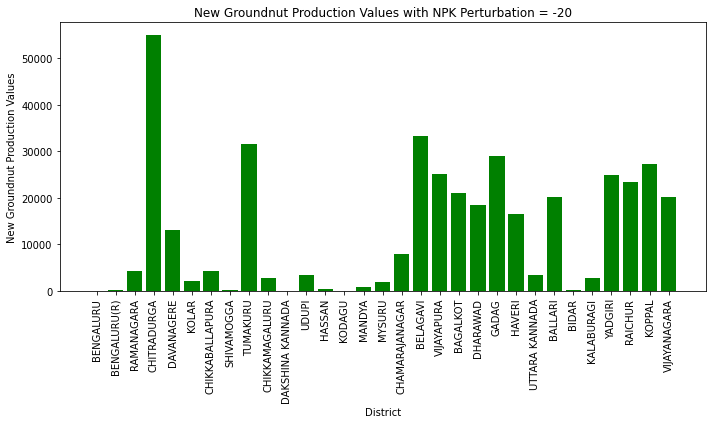

In [278]:
import matplotlib.pyplot as plt

def calculate_and_visualize(perturbation, crop, Working_Directory, what,plot):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle', # Only for Maize
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated', # Canal is only for Rice
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }

    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    # if()
    # factor = Working_Directory[f'{crop}_Ratio'] * Working_Directory[factor_name]
    factor = Working_Directory[f'{crop}_{what}']
        
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    
    if(plot == True):
    # Visualization
        plt.figure(figsize=(10, 6))
        plt.bar(Working_Directory['District'], New_values, color='green')
        plt.xlabel('District')
        plt.ylabel(f'New {crop} Production Values')
        plt.title(f'New {crop} Production Values with {what} Perturbation = {perturbation}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Example usage:
perturbation = -20
what = 'NPK'  # Factor to be used
crop = 'Groundnut'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize(perturbation, crop, Working_Directory, what,True)


posx and posy should be finite values
posx and posy should be finite values


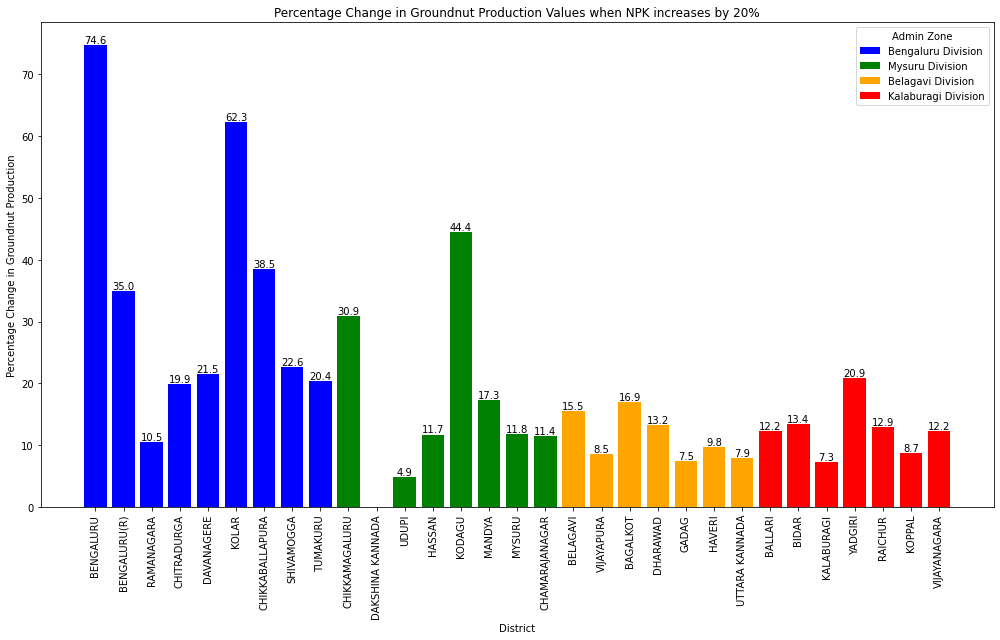

In [279]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    # factor = Working_Directory[f'{crop}_Ratio'] * Working_Directory[factor_name]
    factor = Working_Directory[f'{crop}_{what}']
    
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  ((New_values - Working_Directory[production_col])/Working_Directory[production_col])*100
    
    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    for zone in Working_Directory['Admin_Zone'].unique():
        zone_districts = Working_Directory[Working_Directory['Admin_Zone'] == zone]
        bars = plt.bar(zone_districts['District'], 
                       zone_districts['Change'], 
                       color=zone_colors[zone], 
                       label=zone)
        
        # Add value labels to the bars
        for bar, value in zip(bars, zone_districts['Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{value:.1f}', 
                     ha='center', 
                     va='bottom', 
                     fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=90)
    plt.legend(title='Admin Zone')
    plt.tight_layout()
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Groundnut'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what)


In [280]:
import plotly.express as px
import pandas as pd
import json

# Load the GeoJSON file for Karnataka districts
with open('karnataka.json') as f:
    karnataka_geojson = json.load(f)

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea': 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep': 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    factor = Working_Directory[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] = ((New_values - Working_Directory[production_col]) / Working_Directory[production_col]) * 100
    
    # Return the updated Working_Directory with percentage change for visualization
    return Working_Directory[['District', 'Change']]

# Example usage:
perturbation = 20
what = 'NPK'
crop = 'Groundnut'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
df_changes = calculate_and_visualize_2(perturbation, crop, Working_Directory, what)

# Rename 'District' column to match the GeoJSON properties key
df_changes.rename(columns={'District': 'district'}, inplace=True)

C:\Users\manis\AppData\Local\Temp\ipykernel_33092\2412567815.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [281]:
import plotly.express as px
import pandas as pd
import json

# Load the GeoJSON file for Karnataka districts
with open('karnataka.json') as f:
    karnataka_geojson = json.load(f)
    
district_name_mapping = {
    'BENGALURU': 'Bengaluru Urban',
    'BENGALURU(R)': 'Bengaluru Rural',
    'RAMANAGARA': 'Ramanagara',
    'CHITRADURGA': 'Chitradurga',
    'DAVANAGERE': 'Davanagere',
    'KOLAR': 'Kolar',
    'CHIKKABALLAPURA': 'Chikkaballapura',
    'SHIVAMOGGA': 'Shivamogga',
    'TUMAKURU': 'Tumakuru',
    'CHIKKAMAGALURU': 'Chikkamagaluru',
    'DAKSHINA KANNADA': 'Dakshina Kannada',
    'UDUPI': 'Udupi',
    'HASSAN': 'Hassan',
    'KODAGU': 'Kodagu',
    'MANDYA': 'Mandya',
    'MYSURU': 'Mysuru',
    'CHAMARAJANAGAR': 'Chamarajanagara',
    'BELAGAVI': 'Belagavi',
    'VIJAYAPURA': 'Vijayapura',
    'BAGALKOT': 'Bagalkote',
    'DHARAWAD': 'Dharwad',
    'GADAG': 'Gadag',
    'HAVERI': 'Haveri',
    'UTTARA KANNADA': 'Uttara Kannada',
    'BALLARI': 'Ballari',
    'BIDAR': 'Bidar',
    'KALABURAGI': 'Kalaburagi',
    'YADGIRI': 'Yadgir',
    'RAICHUR': 'Raichur',
    'KOPPAL': 'Koppal',
    'VIJAYANAGARA': 'Vijayanagara'
}
# Apply the district name mapping to the DataFrame
df_changes.loc[:, 'district'] = df_changes['district'].replace(district_name_mapping)

# Print the district names after mapping for verification
print("Mapped Districts in DataFrame:", df_changes['district'].nunique())

Mapped Districts in DataFrame: 31


C:\Users\manis\AppData\Local\Temp\ipykernel_33092\2159318757.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
# Create choropleth map for Karnataka districts with percentage changes
fig = px.choropleth(
    df_changes,
    geojson=karnataka_geojson,
    locations='district',  # Column in df that matches the GeoJSON district names
    featureidkey="properties.district",  # Key in GeoJSON corresponding to district names
    color='Change',  # Column in df used to color the districts
    hover_name='district',  # Hover text to display
    title=f"Karnataka District Map: Percentage Change in {crop} Production due to {what} increase by {perturbation}%"
)

# Update the map scope and center the view
fig.update_geos(
    visible=False,
    fitbounds="locations",
    showcountries=False,
    showsubunits=False
)

# Display the map
fig.show()


Plot saved as Maize_production_change.jpg


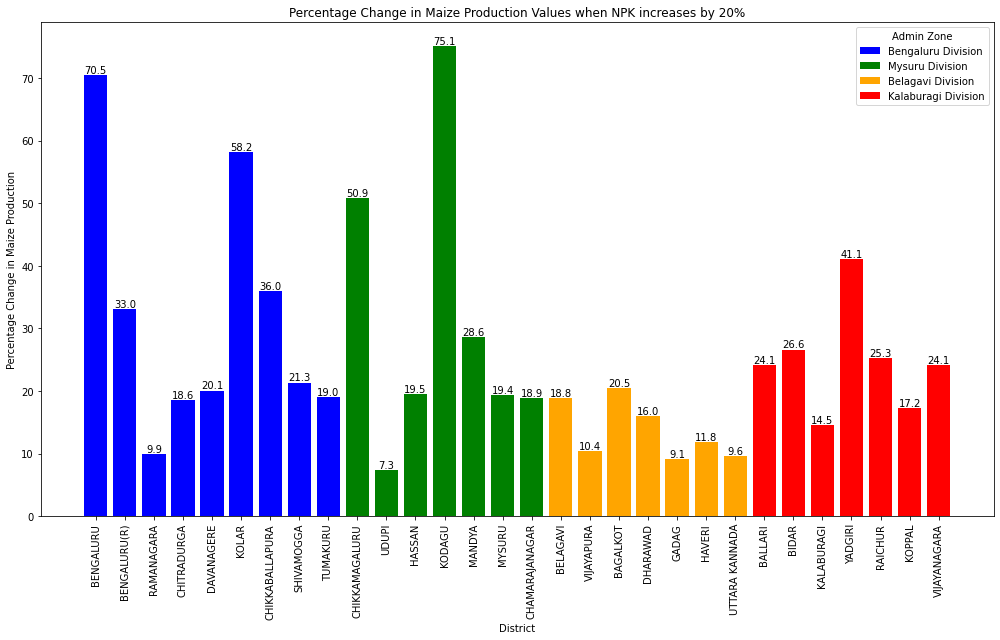

In [283]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what, save_as_image=False, image_name="plot.jpg"):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Filter out rows where the original production is 0
    filtered_df = Working_Directory[Working_Directory[production_col] != 0].copy()
    
    # Calculate the factor
    factor = filtered_df[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(filtered_df['District'])):
        y_new = filtered_df[production_col].iloc[i] + filtered_df[slope_col].iloc[i] * (perturbation * factor.iloc[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the filtered DataFrame
    filtered_df[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    filtered_df['Change'] =  ((New_values - filtered_df[production_col]) / filtered_df[production_col]) * 100
    
    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    for zone in filtered_df['Admin_Zone'].unique():
        zone_districts = filtered_df[filtered_df['Admin_Zone'] == zone]
        bars = plt.bar(zone_districts['District'], 
                       zone_districts['Change'], 
                       color=zone_colors[zone], 
                       label=zone)
        
        # Add value labels to the bars
        for bar, value in zip(bars, zone_districts['Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{value:.1f}', 
                     ha='center', 
                     va='bottom', 
                     fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=90)
    plt.legend(title='Admin Zone')
    plt.tight_layout()
    
    # Save the plot as a jpg if save_as_image is True
    if save_as_image:
        plt.savefig(image_name, format='jpg', dpi=300)
        print(f"Plot saved as {image_name}")
    
    # Show the plot
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what, save_as_image=True, image_name="Maize_production_change.jpg")


ReadME 1 Complete

ReadME 2 Start

1. We calculate stress and stability from results obtained in predictive analysis.
2. L2 Norm and Bonacich Centralities are used to calculate the stress and stability values.
3. Adjacency matrix is pre loaded.


1D Modeling

In [284]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [285]:
# Other_Directory = pd.read_csv('Regression_Results.csv')
# Other_Directory.drop(Other_Directory.columns[[0]], axis=1, inplace=True)
# Other_Directory

In [286]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [287]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Rice_Canal,Slope_Rice_GArea,Slope_Rice_Tractors,Slope_Rice_Sheep,Slope_Rice_Tubewells,R - NPK -20,M - NPK -20,G - NPK -20,G - NPK 20,Change
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,27.373849,-1.237001,71.501051,6.136299,31.699709,1055,848,17,124,74.647887
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,27.373849,-1.237001,71.501051,6.136299,31.699709,1595,28510,133,278,34.951456
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,27.373849,-1.237001,71.501051,6.136299,31.699709,10963,9419,4320,5339,10.538302
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,27.373849,-1.237001,71.501051,6.136299,31.699709,3739,221442,54934,82215,19.890631
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,27.373849,-1.237001,71.501051,6.136299,31.699709,393768,474412,13026,20157,21.486258
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,27.373849,-1.237001,71.501051,6.136299,31.699709,374,735,2191,9428,62.271945
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,27.373849,-1.237001,71.501051,6.136299,31.699709,1751,67498,4382,9881,38.544588
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,27.373849,-1.237001,71.501051,6.136299,31.699709,304934,178197,191,304,22.580645
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,27.373849,-1.237001,71.501051,6.136299,31.699709,21211,54138,31550,47701,20.378035
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,7.256637,-9.150275,53.250465,1.966294,11.158536,85398,30149,2702,5115,30.851880


In [288]:
# Which perturbation we want stress and stability for
Name = 'M - NPK -20'
Capability_list = normalize_list(Working_Directory[f'{Name}'])
# Capability_list

In [289]:
import numpy as np

def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            stability[i] = 1
        
    return stress, stability

Name = 'M - NPK -20'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)

print("Stress values:", stress)
print("Stability values:", stability)

Stress values: [3.81872718e-02 4.17864641e-03 7.17696854e-02 1.64649714e-01
 6.65423725e-01 9.96370244e-02 8.36902664e-02 3.33043852e-05
 7.84866319e-02 2.96907390e-01 1.59911638e-01 1.21058805e-01
 4.91598723e-01 2.57130933e-01 2.08116995e-01 1.85935432e-02
 1.58894941e-01 7.22599766e-01 1.39783564e-01 1.92296991e-02
 3.56199885e-01 1.63548621e-01 4.57099375e-01 4.12436869e-01
 2.62131710e-01 2.20378068e-02 1.18750509e-01 1.48406870e-01
 2.69096060e-01 1.27621561e-01 3.33376193e-01]
Stability values: [0.96181273 0.99582135 0.92823031 0.83535029 0.33457628 0.90036298
 0.91630973 0.9999667  0.92151337 0.70309261 0.84008836 0.87894119
 0.50840128 0.74286907 0.791883   0.98140646 0.84110506 0.27740023
 0.86021644 0.9807703  0.64380011 0.83645138 0.54290063 0.58756313
 0.73786829 0.97796219 0.88124949 0.85159313 0.73090394 0.87237844
 0.66662381]


In [290]:
# Combined calculation function
def calculate_metrics(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    Capability_list = normalize_list(Working_Directory[capability_name])
    
    def calculate_avg_capability(capability, neighbors):
        num_neighbors = len(neighbors)
        if num_neighbors == 0:
            return 0
        return sum(capability[n] for n in neighbors) / num_neighbors

    def calculate_stress_stability(capability, adjacency_matrix):
        n = len(capability)
        stress = np.zeros(n)
        stability = np.zeros(n)
        for i in range(n):
            neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
            if len(neighbors) > 0:
                avg_capability = calculate_avg_capability(capability, neighbors)
                stress[i] = abs(avg_capability - capability[i])
                stability[i] = 1 - stress[i]
            else:
                stress[i] = 0
                stability[i] = 1
        return stress, stability

    # Calculate stress and stability
    stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    stability_column_name = f'Stability_{crop[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop[0].upper()}_{what}_{perturbation}'
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return stability, stress, impact, stability_column_name, stress_column_name, impact_column_name


In [291]:
# Impact calculation function
def calculate_impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'

    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return impact, impact_column_name


Code for generating the Data for Differential Impact Analysis

In [292]:
# Combined calculation function
def calculate_Change_Impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    calculate_and_visualize(perturbation, crop, Working_Directory, what,False)
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    change = (new_production - original_production) 
    impact = ((new_production - original_production) / original_production) * 100

    return change,impact,new_production


For Maize Differential Impact

In [293]:
# Perturbations and factor mapping
crop = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'MSeeds': 'SowingSeedsDistributed_Maize',
    'Cattle': 'LivestockCensus_2012_Cattle',
    'MArea': 'AreaUnderCereals_Maize',
    'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
}

# Initialize an empty DataFrame to store the results
Maize_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Maize_Diff_Impact = pd.concat([Maize_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Maize_Diff_Impact.to_csv('DIA\Maize_Diff_Impact.csv',index=False)
Maize_Diff_Impact

,District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change
0,BENGALURU,2879,10,TotalNPK,3894,35.255297,1015
1,BENGALURU(R),42583,10,TotalNPK,49619,16.523026,7036
2,RAMANAGARA,10450,10,TotalNPK,10965,4.928230,515
3,CHITRADURGA,271975,10,TotalNPK,297241,9.289824,25266
4,DAVANAGERE,593544,10,TotalNPK,653109,10.035482,59565
...,...,...,...,...,...,...,...
615,KALABURAGI,14621,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,13035,-10.847411,-1586
616,YADGIRI,2673,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,2453,-8.230453,-220
617,RAICHUR,723,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,688,-4.840941,-35
618,KOPPAL,190252,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,159759,-16.027690,-30493


For Rice Differential Impact

In [294]:
# Perturbations and factor mapping
crop = 'Rice'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'PArea': 'AreaUnderCereals_Paddy',
    'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated'
}

# Initialize an empty DataFrame to store the results
Rice_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Rice Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Rice Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Rice_Diff_Impact = pd.concat([Rice_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Rice_Diff_Impact.to_csv('DIA\Rice_Diff_Impact.csv',index=False)
Rice_Diff_Impact

,District,Original Rice Production Value,Perturbation,Factor,New Rice Production Values,Percentage Change,Change
0,BENGALURU,3376.0,10,TotalNPK,4536,34.360190,1160.0
1,BENGALURU(R),2354.0,10,TotalNPK,2733,16.100255,379.0
2,RAMANAGARA,12128.0,10,TotalNPK,12710,4.798813,582.0
3,CHITRADURGA,4566.0,10,TotalNPK,4979,9.045116,413.0
4,DAVANAGERE,489505.0,10,TotalNPK,537373,9.778858,47868.0
...,...,...,...,...,...,...,...
367,KALABURAGI,7888.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,7610,-3.524341,-278.0
368,YADGIRI,224659.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,166798,-25.755033,-57861.0
369,RAICHUR,492342.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,417685,-15.163646,-74657.0
370,KOPPAL,243505.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,229981,-5.553890,-13524.0


For Groundnut

In [295]:
# Perturbations and factor mapping
crop = 'Groundnut'
perturbations = [10, -10, 20, -20]

factor_mapping = {
    'NPK': 'TotalNPK',
    'GArea': 'AreaUnderOilSeeds_GroundNut',
    'Tractors': 'MotorVehicles_Tractors',
    'Sheep': 'LivestockCensus_2012_Sheep' 
}

# Initialize an empty DataFrame to store the results
Groundnut_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Groundnut_Diff_Impact = pd.concat([Groundnut_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Groundnut_Diff_Impact.to_csv('DIA\Groundnut_Diff_Impact.csv',index=False)
Groundnut_Diff_Impact

,District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change
0,BENGALURU,71.0,10,TotalNPK,97,36.619718,26.0
1,BENGALURU(R),206.0,10,TotalNPK,242,17.475728,36.0
2,RAMANAGARA,4830.0,10,TotalNPK,5084,5.258799,254.0
3,CHITRADURGA,68575.0,10,TotalNPK,75395,9.945315,6820.0
4,DAVANAGERE,16592.0,10,TotalNPK,18374,10.740116,1782.0
...,...,...,...,...,...,...,...
491,KALABURAGI,3114.0,-20,LivestockCensus_2012_Sheep,3055,-1.894669,-59.0
492,YADGIRI,31435.0,-20,LivestockCensus_2012_Sheep,26822,-14.674726,-4613.0
493,RAICHUR,26958.0,-20,LivestockCensus_2012_Sheep,24298,-9.867201,-2660.0
494,KOPPAL,29982.0,-20,LivestockCensus_2012_Sheep,27277,-9.022080,-2705.0


In [296]:
Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,G - NPK -10,G - GArea -10,G - Tractors -10,G - Sheep -10,G - GArea 20,G - Tractors 20,G - Sheep 20,G - GArea -20,G - Tractors -20,G - Sheep -20
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,...,44,66,42,67,80,128,77,61,13,64
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,...,169,194,202,197,229,212,222,182,199,189
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,...,4575,4607,4168,4642,5275,6152,5204,4384,3507,4455
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,...,61754,62055,62570,62165,81613,80583,81394,55536,56566,55755
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,...,14809,15562,15608,16371,18651,18558,17032,14532,14625,16151


Visualization

In [297]:
import plotly.express as px

# Visualization function
def Calculate_and_visualize_1D(Working_Directory, crop, perturbation, what):
    calculate_and_visualize(perturbation, crop, Working_Directory, what, False)
    stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, what)
    
    # Add metrics to Working_Directory DataFrame
    Working_Directory[stability_column_name] = stability
    Working_Directory[stress_column_name] = stress
    Working_Directory[impact_column_name] = impact
    
    # Prepare data for Plotly
    for_plots = Working_Directory[[stability_column_name, impact_column_name, 'Abbreviation']].copy()
    for_plots.rename(columns={stability_column_name: 'stability', impact_column_name: 'Impact'}, inplace=True)

    # Create scatter plot with Plotly
    fig_increase = px.scatter(
        for_plots,
        x='stability',
        y='Impact',
        title=f'Impact vs Stability ({crop} +{perturbation}% {what})',
        labels={'stability': 'Stability', 'Impact': 'Impact'},
        text='Abbreviation',
        size_max=8,
        width=800,
        height=500
    )

    # Update hover labels
    fig_increase.update_traces(
        hoverlabel=dict(bgcolor='grey', font=dict(color='white')),
        textposition='top center'
    )

    # Calculate and add average lines
    avg_x_increase = for_plots['stability'].mean()
    avg_y_increase = for_plots['Impact'].mean()

    fig_increase.add_shape(
        type='line',
        x0=min(for_plots['stability']),
        x1=max(for_plots['stability']),
        y0=avg_y_increase,
        y1=avg_y_increase,
        line=dict(color='blue', width=2, dash='dash')
    )
    fig_increase.add_shape(
        type='line',
        x0=avg_x_increase,
        x1=avg_x_increase,
        y0=min(for_plots['Impact']),
        y1=max(for_plots['Impact']),
        line=dict(color='red', width=2, dash='dash')
    )

    # Add annotations for average lines
    fig_increase.add_annotation(
        x=avg_x_increase,
        y=max(for_plots['Impact']),
        text='Avg Stability',
        showarrow=False,
        font=dict(color='red')
    )
    fig_increase.add_annotation(
        x=max(for_plots['stability']),
        y=avg_y_increase,
        text='Avg Impact',
        showarrow=False,
        font=dict(color='blue')
    )

    # Add tooltips
    fig_increase.update_traces(
        hoverinfo='text+name',
        hovertext=["Impact: " + str(y) +
                   f"<br>Stability: {x}"
                   for x, y in zip(for_plots['stability'], for_plots['Impact'])]
    )

    # Show the plot
    fig_increase.show()

# Example usage
crop = 'Groundnut'
perturbation = 20
what = 'NPK'
Calculate_and_visualize_1D(Working_Directory, crop, perturbation, what)


1D Differential Impact

Maize

In [298]:
# Perturbations and factor mapping
crop = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'MSeeds': 'SowingSeedsDistributed_Maize',
    'Cattle': 'LivestockCensus_2012_Cattle',
    'MArea': 'AreaUnderCereals_Maize',
    'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
}

# Initialize an empty DataFrame to store the results
Maize_1D_Diff_Impact = pd.DataFrame()

Name = 'Maize_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)
        
        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Maize_1D_Diff_Impact = pd.concat([Maize_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Maize_1D_Diff_Impact.to_csv('1D\Maize_1D_Diff_Impact.csv',index=False)
Maize_1D_Diff_Impact

,District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,2879,10,TotalNPK,3894,35.255297,1015,0.039824,0.960176,0.040419,0.959581
1,BENGALURU(R),42583,10,TotalNPK,49619,16.523026,7036,0.008582,0.991418,0.010181,0.989819
2,RAMANAGARA,10450,10,TotalNPK,10965,4.928230,515,0.076609,0.923391,0.078366,0.921634
3,CHITRADURGA,271975,10,TotalNPK,297241,9.289824,25266,0.144899,0.855101,0.137726,0.862274
4,DAVANAGERE,593544,10,TotalNPK,653109,10.035482,59565,0.668253,0.331747,0.669282,0.330718
...,...,...,...,...,...,...,...,...,...,...,...
615,KALABURAGI,14621,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,13035,-10.847411,-1586,0.105540,0.894460,0.086933,0.913067
616,YADGIRI,2673,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,2453,-8.230453,-220,0.131219,0.868781,0.112223,0.887777
617,RAICHUR,723,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,688,-4.840941,-35,0.259924,0.740076,0.219021,0.780979
618,KOPPAL,190252,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,159759,-16.027690,-30493,0.118701,0.881299,0.130440,0.869560


For Rice

In [299]:
# Perturbations and factor mapping
crop = 'Rice'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'PArea': 'AreaUnderCereals_Paddy',
    'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated'
}

# Initialize an empty DataFrame to store the results
Rice_1D_Diff_Impact = pd.DataFrame()

Name = 'Rice_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)

        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Rice Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Rice Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Rice_1D_Diff_Impact = pd.concat([Rice_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Rice_1D_Diff_Impact.to_csv('1D\Rice_1D_Diff_Impact.csv',index=False)
Rice_1D_Diff_Impact

,District,Original Rice Production Value,Perturbation,Factor,New Rice Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,3376.0,10,TotalNPK,4536,34.360190,1160.0,0.007852,0.992148,0.005929,0.994071
1,BENGALURU(R),2354.0,10,TotalNPK,2733,16.100255,379.0,0.013545,0.986455,0.013519,0.986481
2,RAMANAGARA,12128.0,10,TotalNPK,12710,4.798813,582.0,0.107070,0.892930,0.105072,0.894928
3,CHITRADURGA,4566.0,10,TotalNPK,4979,9.045116,413.0,0.412582,0.587418,0.413200,0.586800
4,DAVANAGERE,489505.0,10,TotalNPK,537373,9.778858,47868.0,0.643060,0.356940,0.648644,0.351356
...,...,...,...,...,...,...,...,...,...,...,...
367,KALABURAGI,7888.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,7610,-3.524341,-278.0,0.137598,0.862402,0.116626,0.883374
368,YADGIRI,224659.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,166798,-25.755033,-57861.0,0.117538,0.882462,0.059861,0.940139
369,RAICHUR,492342.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,417685,-15.163646,-74657.0,0.726115,0.273885,0.730162,0.269838
370,KOPPAL,243505.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,229981,-5.553890,-13524.0,0.124166,0.875834,0.188266,0.811734


For Groundnut

In [300]:
# Perturbations and factor mapping
crop = 'Groundnut'
perturbations = [10, -10, 20, -20]

factor_mapping = {
    'NPK': 'TotalNPK',
    'GArea': 'AreaUnderOilSeeds_GroundNut',
    'Tractors': 'MotorVehicles_Tractors',
    'Sheep': 'LivestockCensus_2012_Sheep' 
}

# Initialize an empty DataFrame to store the results
Groundnut_1D_Diff_Impact = pd.DataFrame()

Name = 'Groundnut_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)
        
        District = Working_Directory['District']
        Orig = Working_Directory[f'{crop}_Production']
        
        temp_df = pd.DataFrame({
            'District' : District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Groundnut_1D_Diff_Impact = pd.concat([Groundnut_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Groundnut_1D_Diff_Impact.to_csv('1D\Groundnut_1D_Diff_Impact.csv',index=False)
Groundnut_1D_Diff_Impact

,District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,71.0,10,TotalNPK,97,36.619718,26.0,0.035684,0.964316,0.034034,0.965966
1,BENGALURU(R),206.0,10,TotalNPK,242,17.475728,36.0,0.164605,0.835395,0.169133,0.830867
2,RAMANAGARA,4830.0,10,TotalNPK,5084,5.258799,254.0,0.074782,0.925218,0.077101,0.922899
3,CHITRADURGA,68575.0,10,TotalNPK,75395,9.945315,6820.0,0.690838,0.309162,0.694333,0.305667
4,DAVANAGERE,16592.0,10,TotalNPK,18374,10.740116,1782.0,0.090815,0.909185,0.083606,0.916394
...,...,...,...,...,...,...,...,...,...,...,...
491,KALABURAGI,3114.0,-20,LivestockCensus_2012_Sheep,3055,-1.894669,-59.0,0.242469,0.757531,0.262027,0.737973
492,YADGIRI,31435.0,-20,LivestockCensus_2012_Sheep,26822,-14.674726,-4613.0,0.178418,0.821582,0.162527,0.837473
493,RAICHUR,26958.0,-20,LivestockCensus_2012_Sheep,24298,-9.867201,-2660.0,0.007401,0.992599,0.008204,0.991796
494,KOPPAL,29982.0,-20,LivestockCensus_2012_Sheep,27277,-9.022080,-2705.0,0.059202,0.940798,0.095145,0.904855


ReadME 2 Complete

2D Modeling

ReadME 3

In [301]:
import plotly.express as px
import numpy as np
import pandas as pd

# Function to calculate stress and stability for a combined capability of two crops
def calculate_stress_stability(adj_matrix, df):
    df['stress'] = 0.0
    df['stability'] = 0.0
    capability_columns = df.columns.difference(['node', 'stress', 'stability'])
    
    for idx, row in df.iterrows():
        node = row['node']
        node_idx = df.index[df['node'] == node][0]
        neighbors_idx = np.where(adj_matrix[node_idx] == 1)[0]
        
        if len(neighbors_idx) > 0:
            neighbor_capabilities = df.iloc[neighbors_idx][capability_columns].values
            centroid = np.mean(neighbor_capabilities, axis=0)
            node_capabilities = row[capability_columns].values
            stress = np.linalg.norm(node_capabilities - centroid)
            stability = 1 - stress
        else:
            stress = 0
            stability = 1
        
        df.at[idx, 'stress'] = stress
        df.at[idx, 'stability'] = stability
    
    return df

# Function to calculate impact for a specific crop
def calculate_impact(Working_Directory, crop, perturbation, what):
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'
    return impact, impact_column_name

# Function to calculate and visualize stability vs impact for two crops
def Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what,visualize = True):
    # Normalize capabilities for both crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Calculate average values
        avg_stability = result_df['stability'].mean()
        avg_impact = pd.concat([impact1, impact2]).mean()  # Combine impacts and calculate average
        
        # Calculate min and max values for impact columns
        min_impact = plot_df[[f'{crop1}', f'{crop2}']].min().min()
        max_impact = plot_df[[f'{crop1}', f'{crop2}']].max().max()
        
        # Plot using Plotly Express
        fig = px.scatter(
            plot_df,
            x='Stability',
            y=[f'{crop1}', f'{crop2}'],  # Plot both impacts
            title=f'Impact vs Stability for {crop1} and {crop2} ({what} +{perturbation}%)',
            labels={'Stability': 'Stability', 'Impact': 'Impact'},
            text='Abbreviation',
            width=900,
            height=600
        )
        
        # Add average lines
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact,
            y1=avg_impact,
            line=dict(color='red', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=avg_stability,
            x1=avg_stability,
            y0=min_impact,
            y1=max_impact,
            line=dict(color='blue', width=2, dash='dash')
        )
        
        # Add annotations for average lines
        fig.add_annotation(
            x=avg_stability,
            y=max_impact,
            text='Avg Stability',
            showarrow=False,
            font=dict(color='blue')
        )
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact,
            text='Avg Impact',
            showarrow=False,
            font=dict(color='red')
        )
        
        # Update y-axis title and legend title
        fig.update_layout(
            yaxis_title='Impact',
            legend_title='Legend'
        )
        
        # Update hover labels to only show text for one crop
        fig.update_traces(
            hoverlabel=dict(bgcolor='grey', font=dict(color='white')),
            textposition='top center',
            selector=dict(mode='markers+text')
        )
        
        # Show the plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 10
what = 'NPK'
Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what)


In [302]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,G - GArea -20,G - Tractors -20,G - Sheep -20,Stability_G_NPK_20,Stress_G_NPK_20,Impact_G_NPK_20,Impact_R_NPK_10,Impact_M_NPK_10,Stability_R_M_NPK_10,Stress_R_M_NPK_10
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,61,13,64,0.967348,0.032652,74.647887,34.360190,35.255297,0.959148,0.040852
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,182,199,189,0.827080,0.172920,34.951456,16.100255,16.523026,0.983076,0.016924
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,4384,3507,4455,0.920968,0.079032,10.538302,4.798813,4.928230,0.868922,0.131078
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,55536,56566,55755,0.302760,0.697240,19.890631,9.045116,9.289824,0.564451,0.435549
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,14532,14625,16151,0.922417,0.077583,21.486258,9.778858,10.035482,0.067972,0.932028
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,4649,1138,3205,0.947108,0.052892,62.271945,28.240741,29.050597,0.870140,0.129860
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,4498,5251,5626,0.887433,0.112567,38.544588,17.531505,18.007223,0.872467,0.127533
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,188,217,246,0.874052,0.125948,22.580645,10.395247,10.668250,0.616873,0.383127
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,30893,30079,31565,0.601569,0.398431,20.378035,9.273481,9.517258,0.865026,0.134974
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,3095,2718,3436,0.793305,0.206695,30.851880,11.369455,25.428259,0.715938,0.284062


In [303]:
Rice_Prod = normalize_list(Working_Directory['Rice_Production'])
Maize_Prod = normalize_list(Working_Directory['Maize_Production'])

# Combine capabilities into a single DataFrame
combined_df = pd.DataFrame({
    'node': Working_Directory['District'],
    'Rice_Production': Rice_Prod,
    'Maize_Production': Maize_Prod
})

# Calculate stress and stability for the combined capabilities
init_df = calculate_stress_stability(adj_matrix_np, combined_df)
init_df[:5]

,node,Rice_Production,Maize_Production,stress,stability
0,BENGALURU,0.006686,0.004851,0.040591,0.959409
1,BENGALURU(R),0.004609,0.071744,0.016035,0.983965
2,RAMANAGARA,0.024465,0.017606,0.131655,0.868345
3,CHITRADURGA,0.009103,0.458222,0.437286,0.562714
4,DAVANAGERE,0.994237,1.000000,0.927410,0.072590


In [304]:
# Perturbations and factor mapping
crop1 = 'Rice'
crop2 = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK'
}

# Initialize an empty DataFrame to store the results
R_M_2D_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function to calculate and visualize 2D
        calculate_and_visualize(perturbation, crop1, Working_Directory, factor, False)
        calculate_and_visualize(perturbation, crop2, Working_Directory, factor, False)
        Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, factor, False)
        
        # Collect all the new columns in a dictionary
        new_columns = {
            'District': Working_Directory['District'],
            'Original Rice Production': Working_Directory[f'{crop1}_Production'],
            'Original Maize Production': Working_Directory[f'{crop2}_Production'],
            'Initial Stress': init_df['stress'],
            'Initial Stability': init_df['stability'],
            'New Rice Production': Working_Directory[f'{crop1[0].upper()} - {factor} {perturbation}'],
            'New Maize Production': Working_Directory[f'{crop2[0].upper()} - {factor} {perturbation}'],
            'Rice Impact': Working_Directory[f'Impact_{crop1[0].upper()}_{factor}_{perturbation}'],
            'Maize Impact': Working_Directory[f'Impact_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Perturbation': perturbation,
            'Factor': mapped_factor,
        }
        
        # Convert the dictionary to a DataFrame and append it to the final DataFrame
        temp_df = pd.DataFrame(new_columns)
        R_M_2D_Diff_Impact = pd.concat([R_M_2D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
R_M_2D_Diff_Impact.to_csv('2D\R_M_2D_Diff_Impact.csv', index=False)
R_M_2D_Diff_Impact


,District,Original Rice Production,Original Maize Production,Initial Stress,Initial Stability,New Rice Production,New Maize Production,Rice Impact,Maize Impact,Stability,Stress,Perturbation,Factor
0,BENGALURU,3376.0,2879,0.040591,0.959409,4536,3894,34.360190,35.255297,0.959148,0.040852,10,TotalNPK
1,BENGALURU(R),2354.0,42583,0.016035,0.983965,2733,49619,16.100255,16.523026,0.983076,0.016924,10,TotalNPK
2,RAMANAGARA,12128.0,10450,0.131655,0.868345,12710,10965,4.798813,4.928230,0.868922,0.131078,10,TotalNPK
3,CHITRADURGA,4566.0,271975,0.437286,0.562714,4979,297241,9.045116,9.289824,0.564451,0.435549,10,TotalNPK
4,DAVANAGERE,489505.0,593544,0.927410,0.072590,537373,653109,9.778858,10.035482,0.067972,0.932028,10,TotalNPK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,KALABURAGI,7888.0,14621,0.173413,0.826587,7111,12502,-9.850406,-14.492853,0.833657,0.166343,-20,TotalNPK
120,YADGIRI,224659.0,2673,0.176163,0.823837,161851,1573,-27.957037,-41.152263,0.840648,0.159352,-20,TotalNPK
121,RAICHUR,492342.0,723,0.771235,0.228765,407375,539,-17.257719,-25.449516,0.221616,0.778384,-20,TotalNPK
122,KOPPAL,243505.0,190252,0.171777,0.828223,214969,157447,-11.718856,-17.242920,0.799019,0.200981,-20,TotalNPK


3d modelling

In [305]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

def Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2, crop3, perturbation, what, visualize=True):
    # Normalize capabilities for all three crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    capability_3 = normalize_list(Working_Directory[f'{crop3[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2,
        'Capability_3': capability_3
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    impact3, impact_column3 = calculate_impact(Working_Directory, crop3, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{crop3[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{crop3[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[impact_column3] = impact3
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            f'{crop3}': impact3,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Create the figure
        fig = go.Figure()

        # Add scatter plot for each crop's impact with custom hovertemplate
        fig.add_trace(go.Scatter(
            x=plot_df['Stability'], 
            y=plot_df[f'{crop1}'], 
            mode='markers',
            name=f'{crop1}',
            text=plot_df['Abbreviation'],
            marker=dict(size=8),
            hovertemplate=(
                '<b>District:</b> %{text}<br>' +
                '<b>Stability:</b> %{x}<br>' +
                '<b>Impact:</b> %{y}<br>' 
            )
        ))
        
        fig.add_trace(go.Scatter(
            x=plot_df['Stability'], 
            y=plot_df[f'{crop2}'], 
            mode='markers',
            name=f'{crop2}',
            text=plot_df['Abbreviation'],
            marker=dict(size=8),
            hovertemplate=(
                '<b>District:</b> %{text}<br>' +
                '<b>Stability:</b> %{x}<br>' +
                '<b>Impact:</b> %{y}<br>'
            )
        ))
        
        fig.add_trace(go.Scatter(
            x=plot_df['Stability'], 
            y=plot_df[f'{crop3}'], 
            mode='markers',
            name=f'{crop3}',
            text=plot_df['Abbreviation'],
            marker=dict(size=8),
            hovertemplate=(
                '<b>District:</b> %{text}<br>' +
                '<b>Stability:</b> %{x}<br>' +
                '<b>Impact:</b> %{y}<br>'
            )
        ))

        # Customize layout
        fig.update_layout(
            title=f'Impact vs Stability for {crop1}, {crop2}, and {crop3} ({what} +{perturbation}%)',
            xaxis_title='Stability',
            yaxis_title='Impact (%)',
            width=900,
            height=600,
            legend_title_text='Crops',
            hovermode='closest'
        )
        
        # Show the 2D plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
crop3 = 'Groundnut'
perturbation = 10
what = 'NPK'
Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2, crop3, perturbation, what)


ReadME 3 Complete

ReadME 4

1. Prescriptive Analysis.
2. Load the Dataset.
3. Divide the dataset according to the admin zones.
4. Run four Multiple Linear Regression Models as per the admin zones.
5. Make a datframe with all sensitivity values populated.
6. Take a cartesian product of previously loaded dataset - 'Case_File' and the dataset of sensitivity values.
7. Populate the coefficients found from multiple linear regression into each row of the above derived dataset. This would be our final working directory.
8. Decide a Target, apply the formula to find the new values of each factor. Append it in the final working directory.
9. Calculate the new Maize production values using the new values of the factors.
10. Normalize the production values.
11. Take a batch size of 30 - Number of Districts, and run the L2 Norm Stress and Stability functions, store it in the final working directory respective to each row.

Prescriptive Analysis

In [306]:
import pandas as pd
import statsmodels.api as sm


Case_file = pd.read_csv('Params/5_Param_Maize_Multicollinearity.csv')
# Case_file.drop(Case_file.columns[[0,5,6]],axis = 1, inplace=True)
y = Working_Directory['Maize_Production']
Case_file[:5]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
0,4.45,2567.461578,1129,438.180210,175.723235
1,134.73,25037.139270,14867,3036.080250,3197.193185
2,260.15,7729.614277,1987,222.225258,709.859804
3,5004.00,83821.593090,92194,10902.406570,28105.507250
4,6124.60,85657.632090,173400,25702.835480,20213.730880


In [307]:
if(len(Case_file) < 31):
    row_24 = Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Case_file.iloc[24] = halved_row_24
    Case_file.loc[len(Case_file)] = halved_row_24

Case_file[24:]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
24,2859.005,23446.847905,49869.5,8404.154610,5124.306675
25,24.550,2371.831678,1382.0,249.381182,201.341576
26,165.000,6221.617910,2634.0,710.101614,641.759644
27,0.000,1253.317144,961.0,368.617469,88.878158
28,14.350,188.537479,2600.0,61.547519,13.949581
29,5292.000,38936.400170,48210.0,10997.550400,12343.237180
30,2859.005,23446.847905,49869.5,8404.154610,5124.306675


In [308]:
Case_file =sm.add_constant(Case_file)
Case_file.head()
list(y)
Zone_1 = Case_file[0:9]
Zone_2 = Case_file[9:17]
Zone_3 = Case_file[17:24]
Zone_4 = Case_file[24:31]

y_1 = y[0:9]
y_2 = y[9:17]
y_3 = y[17:24]
y_4 = y[24:31]

Zone_3


,const,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
17,1.0,11883.58,159047.08620,131163.0,48288.815130,37481.297970
18,1.0,2682.76,48619.50708,40207.0,10420.071650,21812.245220
19,1.0,5678.15,75578.05200,44300.0,22940.521250,31781.380300
20,1.0,2471.35,33424.64560,30900.0,6447.725408,3590.483189
21,1.0,4111.00,34261.98177,34163.0,5591.244159,10006.597790
22,1.0,11325.60,95150.64027,170696.0,21731.170720,21067.544410
23,1.0,1469.20,22563.77108,4576.0,1025.616827,566.513342


In [309]:
model_1=sm.OLS(y_1,Zone_1).fit()
model_1.summary()

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Maize_Production   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     70.52
Date:                Mon, 16 Sep 2024   Prob (F-statistic):            0.00261
Time:                        16:00:46   Log-Likelihood:                -100.33
No. Observations:                   9   AIC:                             212.7
Df Residuals:                       3   BIC:                             213.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 3419.4223   1.82e+04      0.188      0.863   -5.45e+04    6.13e+04
SowingSeedsDistributed_Maize_320                                        62.9730     41.999      1.499      0.231     -70.685     196.631
LivestockCensus_2012_Cattle_354                                         -6.7601      3.014     -2.243      0.111     -16.351       2.830
AreaUnderCereals_Maize_193                                             -16.0541      7.529     -2.132      0.123     -40.016       7.908
TotalNPK_315                                                           119.0486     45.353      2.625      0.079     -25.284     263.381
NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182    24.9171     11.941      2.087      0.128     -13.084      62.918
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.264
Skew:                           0.206   Prob(JB):                        0.876
Kurtosis:                       2.269   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [310]:
model_1.params.values
coef_1=model_1.params.values[1:]
coef_1

array([ 62.97303734,  -6.76009808, -16.05408667, 119.04855287,
        24.91714709])

In [311]:
model_2=sm.OLS(y_2,Zone_2).fit()
print(model_2.summary())
model_2.params.values
coef_2=model_2.params.values[1:]
coef_2

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4476.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           0.000223
Time:                        16:00:46   Log-Likelihood:                -66.733
No. Observations:                   8   AIC:                             145.5
Df Residuals:                       2   BIC:                             145.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



array([-5.88524081,  4.25555452, -2.5194702 , -1.48807154, -5.56684531])

In [312]:
model_3=sm.OLS(y_3,Zone_3).fit()
print(model_3.summary())
model_3.params.values
coef_3=model_3.params.values[1:]
coef_3

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     24.14
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.153
Time:                        16:00:46   Log-Likelihood:                -77.770
No. Observations:                   7   AIC:                             167.5
Df Residuals:                       1   BIC:                             167.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



array([-10.02934389,   5.99831574,   0.96161221,  -9.63936197,
         3.87378054])

In [313]:
model_4=sm.OLS(y_4,Zone_4).fit()
print(model_4.summary())
model_4.params.values
coef_4=model_4.params.values[1:]
coef_4

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.547e+24
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           4.76e-13
Time:                        16:00:46   Log-Likelihood:                 114.43
No. Observations:                   7   AIC:                            -216.9
Df Residuals:                       1   BIC:                            -217.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

array([2572.82751777,   46.70144938,  -56.08795977, -107.91698107,
       -929.50895535])

In [314]:
# Case_file.drop('SowingSeedsDistributed_Maize_320', axis=1, inplace=True)
Case_file[:5]

,const,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
0,1.0,4.45,2567.461578,1129.0,438.180210,175.723235
1,1.0,134.73,25037.139270,14867.0,3036.080250,3197.193185
2,1.0,260.15,7729.614277,1987.0,222.225258,709.859804
3,1.0,5004.00,83821.593090,92194.0,10902.406570,28105.507250
4,1.0,6124.60,85657.632090,173400.0,25702.835480,20213.730880


In [315]:
model=sm.OLS(y,Case_file).fit()
print(model.summary())
model.params.values
coef=model.params.values[1:]
coef

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           8.94e-17
Time:                        16:00:46   Log-Likelihood:                -365.16
No. Observations:                  31   AIC:                             742.3
Df Residuals:                      25   BIC:                             750.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

array([-10.28517101,   0.80070117,   2.01451727,   6.62996798,
         0.45246672])

In [316]:
Case_file.drop('const',axis=1,inplace=True)
Case_file[:5]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
0,4.45,2567.461578,1129.0,438.180210,175.723235
1,134.73,25037.139270,14867.0,3036.080250,3197.193185
2,260.15,7729.614277,1987.0,222.225258,709.859804
3,5004.00,83821.593090,92194.0,10902.406570,28105.507250
4,6124.60,85657.632090,173400.0,25702.835480,20213.730880


In [317]:
# # Adding the first coef_ values to the first 9 rows
# Case_file.loc[:8, 'Beta_1'] = coef_1[0]
# Case_file.loc[:8, 'Beta_2'] = coef_1[1]
# Case_file.loc[:8, 'Beta_3'] = coef_1[2]
# Case_file.loc[:8, 'Beta_4'] = coef_1[3]
# Case_file.loc[:8, 'Beta_5'] = coef_1[4]

# # Adding the second coef_ values to the next 8 rows
# Case_file.loc[9:16, 'Beta_1'] = coef_2[0]
# Case_file.loc[9:16, 'Beta_2'] = coef_2[1]
# Case_file.loc[9:16, 'Beta_3'] = coef_2[2]
# Case_file.loc[9:16, 'Beta_4'] = coef_2[3]
# Case_file.loc[9:16, 'Beta_5'] = coef_2[4]

# # Adding the third coef_ values to the next 7 rows
# Case_file.loc[17:23, 'Beta_1'] = coef_3[0]
# Case_file.loc[17:23, 'Beta_2'] = coef_3[1]
# Case_file.loc[17:23, 'Beta_3'] = coef_3[2]
# Case_file.loc[17:23, 'Beta_4'] = coef_3[3]
# Case_file.loc[17:23, 'Beta_5'] = coef_3[4]

# # Adding the fourth coef_ values to the last 6 rows
# Case_file.loc[24:, 'Beta_1'] = coef_4[0]
# Case_file.loc[24:, 'Beta_2'] = coef_4[1]
# Case_file.loc[24:, 'Beta_3'] = coef_4[2]
# Case_file.loc[24:, 'Beta_4'] = coef_4[3]
# Case_file.loc[24:, 'Beta_5'] = coef_4[4]

In [318]:
model.params.values[0]

-6900.34099449337

In [356]:
# Adding the first coef_ values to the first 9 rows
Case_file.loc[:,'Beta_0'] = model.params.values[0]
Case_file.loc[:,'Beta_1'] = coef[0]
Case_file.loc[:,'Beta_2'] = coef[1]
Case_file.loc[:,'Beta_3'] = coef[2]
Case_file.loc[:,'Beta_4'] = coef[3]
Case_file.loc[:,'Beta_5'] = coef[4]
Case_file

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,District_Name,key
0,4.450,2567.461578,1129.0,438.180210,175.723235,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU,1
1,134.730,25037.139270,14867.0,3036.080250,3197.193185,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU(R),1
2,260.150,7729.614277,1987.0,222.225258,709.859804,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,RAMANAGARA,1
3,5004.000,83821.593090,92194.0,10902.406570,28105.507250,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,CHITRADURGA,1
4,6124.600,85657.632090,173400.0,25702.835480,20213.730880,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,DAVANAGERE,1
5,51.500,2278.829821,640.0,220.782906,200.386108,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,KOLAR,1
6,3538.150,71206.945310,59377.0,8196.896749,14559.991860,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,CHIKKABALLAPURA,1
7,3814.020,104722.000400,43827.0,10428.246260,5958.813645,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,SHIVAMOGGA,1
8,1639.850,37944.093760,24207.0,2746.313635,10417.677300,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,TUMAKURU,1
9,2923.790,40572.445630,25831.0,8156.290370,3145.789961,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,CHIKKAMAGALURU,1


In [320]:
divisions = pd.read_excel('Zones.xlsx')
divisions[:5]

,District_Code,District_Name,Administrative Region
0,1,BENGALURU,Bengaluru Division
1,2,BENGALURU(R),Bengaluru Division
2,3,RAMANAGARA,Bengaluru Division
3,4,CHITRADURGA,Bengaluru Division
4,5,DAVANAGERE,Bengaluru Division


In [357]:
Case_file['District_Name'] = divisions['District_Name']
Case_file[:5]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,District_Name,key
0,4.45,2567.461578,1129.0,438.180210,175.723235,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU,1
1,134.73,25037.139270,14867.0,3036.080250,3197.193185,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU(R),1
2,260.15,7729.614277,1987.0,222.225258,709.859804,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,RAMANAGARA,1
3,5004.00,83821.593090,92194.0,10902.406570,28105.507250,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,CHITRADURGA,1
4,6124.60,85657.632090,173400.0,25702.835480,20213.730880,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,DAVANAGERE,1


In [322]:
import numpy as np
import pandas as pd
from itertools import product

In [358]:
intervals = np.arange(0, 1.1, 0.1)
columns=['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354' , 'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315','Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']
# Generate all possible combinations of elements in arr
combinations = product(intervals, repeat=len(columns))
combinations

In [359]:
alpha_df = pd.DataFrame(combinations, columns=columns)
alpha_df

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.1
2,0.0,0.0,0.0,0.0,0.2
3,0.0,0.0,0.0,0.0,0.3
4,0.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...
161046,1.0,1.0,1.0,1.0,0.6
161047,1.0,1.0,1.0,1.0,0.7
161048,1.0,1.0,1.0,1.0,0.8
161049,1.0,1.0,1.0,1.0,0.9


In [360]:
Case_file['key'] = 1
alpha_df['key'] = 1

# Performing the Cartesian product
result_df = pd.merge( alpha_df, Case_file, on='key').drop('key', axis=1)

print(result_df)

         Sensitivity_SowingSeedsDistributed_Maize_320  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
4992576                                           1.0   
4992577                                           1.0   
4992578                                           1.0   
4992579                                           1.0   
4992580                                           1.0   

         Sensitivity_LivestockCensus_2012_Cattle_354  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                  

In [361]:
result_df.head()

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,District_Name
0,0.0,0.0,0.0,0.0,0.0,4.45,2567.461578,1129.0,438.180210,175.723235,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU
1,0.0,0.0,0.0,0.0,0.0,134.73,25037.139270,14867.0,3036.080250,3197.193185,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,BENGALURU(R)
2,0.0,0.0,0.0,0.0,0.0,260.15,7729.614277,1987.0,222.225258,709.859804,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,RAMANAGARA
3,0.0,0.0,0.0,0.0,0.0,5004.00,83821.593090,92194.0,10902.406570,28105.507250,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,CHITRADURGA
4,0.0,0.0,0.0,0.0,0.0,6124.60,85657.632090,173400.0,25702.835480,20213.730880,-6900.340994,-10.285171,0.800701,2.014517,6.629968,0.452467,DAVANAGERE


Target = 40,000
Fnew = Fold + alpha(delta(0))/B - District

Assume Bengaluru division, the avg is 2000

In [327]:
Working_Directory['Maize_Production'].mean()

134853.12903225806

In [363]:
delta_O = 5000

result_df['New_F1'] = result_df['SowingSeedsDistributed_Maize_320'] + (result_df['Sensitivity_SowingSeedsDistributed_Maize_320']*delta_O)/result_df['Beta_1']
result_df['New_F2'] = result_df['LivestockCensus_2012_Cattle_354'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle_354']*delta_O)/result_df['Beta_2']
result_df['New_F3'] = result_df['AreaUnderCereals_Maize_193'] + (result_df['Sensitivity_AreaUnderCereals_Maize_193']*delta_O)/result_df['Beta_3']
result_df['New_F4'] = result_df['TotalNPK_315'] + (result_df['Sensitivity_TotalNPK_315']*delta_O)/result_df['Beta_4']
result_df['New_F5'] = result_df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'] + (result_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']*delta_O)/result_df['Beta_5']
result_df['District'] = np.tile(Working_Directory['District'],11**5)

result_df['New_F1'] = result_df['New_F1'].apply(lambda x: max(0, x))
result_df['New_F2'] = result_df['New_F2'].apply(lambda x: max(0, x))
result_df['New_F3'] = result_df['New_F3'].apply(lambda x: max(0, x))
result_df['New_F4'] = result_df['New_F4'].apply(lambda x: max(0, x))
result_df['New_F5'] = result_df['New_F5'].apply(lambda x: max(0, x))

result_df

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,Beta_3,Beta_4,Beta_5,District_Name,New_F1,New_F2,New_F3,New_F4,New_F5,District
0,0.0,0.0,0.0,0.0,0.0,4.450,2567.461578,1129.0,438.180210,175.723235,...,2.014517,6.629968,0.452467,BENGALURU,4.450000,2567.461578,1129.000000,438.180210,175.723235,BENGALURU
1,0.0,0.0,0.0,0.0,0.0,134.730,25037.139270,14867.0,3036.080250,3197.193185,...,2.014517,6.629968,0.452467,BENGALURU(R),134.730000,25037.139270,14867.000000,3036.080250,3197.193185,BENGALURU(R)
2,0.0,0.0,0.0,0.0,0.0,260.150,7729.614277,1987.0,222.225258,709.859804,...,2.014517,6.629968,0.452467,RAMANAGARA,260.150000,7729.614277,1987.000000,222.225258,709.859804,RAMANAGARA
3,0.0,0.0,0.0,0.0,0.0,5004.000,83821.593090,92194.0,10902.406570,28105.507250,...,2.014517,6.629968,0.452467,CHITRADURGA,5004.000000,83821.593090,92194.000000,10902.406570,28105.507250,CHITRADURGA
4,0.0,0.0,0.0,0.0,0.0,6124.600,85657.632090,173400.0,25702.835480,20213.730880,...,2.014517,6.629968,0.452467,DAVANAGERE,6124.600000,85657.632090,173400.000000,25702.835480,20213.730880,DAVANAGERE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992576,1.0,1.0,1.0,1.0,1.0,165.000,6221.617910,2634.0,710.101614,641.759644,...,2.014517,6.629968,0.452467,KALABURAGI,0.000000,12466.144819,5115.984188,1464.253069,11692.296163,KALABURAGI
4992577,1.0,1.0,1.0,1.0,1.0,0.000,1253.317144,961.0,368.617469,88.878158,...,2.014517,6.629968,0.452467,YADGIRI,0.000000,7497.844053,3442.984188,1122.768924,11139.414677,YADGIRI
4992578,1.0,1.0,1.0,1.0,1.0,14.350,188.537479,2600.0,61.547519,13.949581,...,2.014517,6.629968,0.452467,RAICHUR,0.000000,6433.064388,5081.984188,815.698974,11064.486101,RAICHUR
4992579,1.0,1.0,1.0,1.0,1.0,5292.000,38936.400170,48210.0,10997.550400,12343.237180,...,2.014517,6.629968,0.452467,KOPPAL,4805.863212,45180.927079,50691.984188,11751.701855,23393.773699,KOPPAL


In [364]:
result_df[225008:225009]

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,Beta_3,Beta_4,Beta_5,District_Name,New_F1,New_F2,New_F3,New_F4,New_F5,District
225008,0.0,0.5,0.4,1.0,0.9,0.0,0.0,0.0,0.0,0.0,...,2.014517,6.629968,0.452467,DAKSHINA KANNADA,0.0,3122.263454,992.793675,754.151455,9945.482868,DAKSHINA KANNADA


In [330]:
#result_df[['Target_F1', 'Target_F2', 'Target_F3', 'Target_F4']] = result_df[['Target_F1', 'Target_F2', 'Target_F3', 'Target_F4']].clip(lower=0)

In [366]:
result_df['New_Production'] = result_df['Beta_1'] * result_df['New_F1'] + result_df['Beta_2'] * result_df['New_F2'] + result_df['Beta_3'] * result_df['New_F3'] + result_df['Beta_4'] * result_df['New_F4'] + result_df['Beta_5'] * result_df['New_F5'] + result_df['Beta_0']
result_df

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,Beta_4,Beta_5,District_Name,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production
0,0.0,0.0,0.0,0.0,0.0,4.450,2567.461578,1129.0,438.180210,175.723235,...,6.629968,0.452467,BENGALURU,4.450000,2567.461578,1129.000000,438.180210,175.723235,BENGALURU,368.679152
1,0.0,0.0,0.0,0.0,0.0,134.730,25037.139270,14867.0,3036.080250,3197.193185,...,6.629968,0.452467,BENGALURU(R),134.730000,25037.139270,14867.000000,3036.080250,3197.193185,BENGALURU(R),63286.771167
2,0.0,0.0,0.0,0.0,0.0,260.150,7729.614277,1987.0,222.225258,709.859804,...,6.629968,0.452467,RAMANAGARA,260.150000,7729.614277,1987.000000,222.225258,709.859804,RAMANAGARA,2410.463050
3,0.0,0.0,0.0,0.0,0.0,5004.000,83821.593090,92194.0,10902.406570,28105.507250,...,6.629968,0.452467,CHITRADURGA,5004.000000,83821.593090,92194.000000,10902.406570,28105.507250,CHITRADURGA,279474.528861
4,0.0,0.0,0.0,0.0,0.0,6124.600,85657.632090,173400.0,25702.835480,20213.730880,...,6.629968,0.452467,DAVANAGERE,6124.600000,85657.632090,173400.000000,25702.835480,20213.730880,DAVANAGERE,527565.577540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992576,1.0,1.0,1.0,1.0,1.0,165.000,6221.617910,2634.0,710.101614,641.759644,...,6.629968,0.452467,KALABURAGI,0.000000,12466.144819,5115.984188,1464.253069,11692.296163,KALABURAGI,28385.880070
4992577,1.0,1.0,1.0,1.0,1.0,0.000,1253.317144,961.0,368.617469,88.878158,...,6.629968,0.452467,YADGIRI,0.000000,7497.844053,3442.984188,1122.768924,11139.414677,YADGIRI,18523.279030
4992578,1.0,1.0,1.0,1.0,1.0,14.350,188.537479,2600.0,61.547519,13.949581,...,6.629968,0.452467,RAICHUR,0.000000,6433.064388,5081.984188,815.698974,11064.486101,RAICHUR,18902.735881
4992579,1.0,1.0,1.0,1.0,1.0,5292.000,38936.400170,48210.0,10997.550400,12343.237180,...,6.629968,0.452467,KOPPAL,4805.863212,45180.927079,50691.984188,11751.701855,23393.773699,KOPPAL,170465.143653


In [367]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [368]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [369]:
import numpy as np

def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            stability[i] = 1
        
    return stress, stability

In [370]:
result_df['Normalized_New_Prouction'] = normalize_list(result_df['New_Production'])
result_df

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,Beta_5,District_Name,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Normalized_New_Prouction
0,0.0,0.0,0.0,0.0,0.0,4.450,2567.461578,1129.0,438.180210,175.723235,...,0.452467,BENGALURU,4.450000,2567.461578,1129.000000,438.180210,175.723235,BENGALURU,368.679152,0.011511
1,0.0,0.0,0.0,0.0,0.0,134.730,25037.139270,14867.0,3036.080250,3197.193185,...,0.452467,BENGALURU(R),134.730000,25037.139270,14867.000000,3036.080250,3197.193185,BENGALURU(R),63286.771167,0.111149
2,0.0,0.0,0.0,0.0,0.0,260.150,7729.614277,1987.0,222.225258,709.859804,...,0.452467,RAMANAGARA,260.150000,7729.614277,1987.000000,222.225258,709.859804,RAMANAGARA,2410.463050,0.014745
3,0.0,0.0,0.0,0.0,0.0,5004.000,83821.593090,92194.0,10902.406570,28105.507250,...,0.452467,CHITRADURGA,5004.000000,83821.593090,92194.000000,10902.406570,28105.507250,CHITRADURGA,279474.528861,0.453507
4,0.0,0.0,0.0,0.0,0.0,6124.600,85657.632090,173400.0,25702.835480,20213.730880,...,0.452467,DAVANAGERE,6124.600000,85657.632090,173400.000000,25702.835480,20213.730880,DAVANAGERE,527565.577540,0.846388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992576,1.0,1.0,1.0,1.0,1.0,165.000,6221.617910,2634.0,710.101614,641.759644,...,0.452467,KALABURAGI,0.000000,12466.144819,5115.984188,1464.253069,11692.296163,KALABURAGI,28385.880070,0.055880
4992577,1.0,1.0,1.0,1.0,1.0,0.000,1253.317144,961.0,368.617469,88.878158,...,0.452467,YADGIRI,0.000000,7497.844053,3442.984188,1122.768924,11139.414677,YADGIRI,18523.279030,0.040261
4992578,1.0,1.0,1.0,1.0,1.0,14.350,188.537479,2600.0,61.547519,13.949581,...,0.452467,RAICHUR,0.000000,6433.064388,5081.984188,815.698974,11064.486101,RAICHUR,18902.735881,0.040862
4992579,1.0,1.0,1.0,1.0,1.0,5292.000,38936.400170,48210.0,10997.550400,12343.237180,...,0.452467,KOPPAL,4805.863212,45180.927079,50691.984188,11751.701855,23393.773699,KOPPAL,170465.143653,0.280878


In [371]:
stress_values_list = []
stability_values_list = []

# Define batch size
batch_size = 31

# Iterate over the New_Production column in batches of 31
num_batches = len(result_df) // batch_size

for i in range(num_batches):
    # Get the batch of 31 production values
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = normalize_list(result_df['New_Production'][start_idx:end_idx].values)
    
    # Calculate the stress and stability values for the batch
    stress_batch, stability_batch = calculate_stress_stability(batch, adj_matrix_np)
    
    stress_values_list.extend(stress_batch)
    stability_values_list.extend(stability_batch)


print(num_batches)
print(len(stress_batch))
print(len(stress_values_list), len(stability_values_list))

result_df['Stress_Values'] = stress_values_list
result_df['Stability_Values'] = stability_values_list

161051
31
4992581 4992581


In [372]:
# result_df['New_Production'][2500031:2500062].mean()

In [373]:
y[11]

109

In [374]:
result_df[2250008:2250009]

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Normalized_New_Prouction,Stress_Values,Stability_Values
2250008,0.4,1.0,0.5,0.9,0.2,14.35,188.537479,2600.0,61.547519,13.949581,...,0.0,6433.064388,3840.992094,740.283829,2224.056885,RAICHUR,11902.735881,0.029777,0.234611,0.765389


In [375]:
result_df[225000:225030]

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Normalized_New_Prouction,Stress_Values,Stability_Values
225000,0.0,0.5,0.4,1.0,0.9,260.150,7729.614277,1987.0,222.225258,709.859804,...,260.150,10851.877731,2979.793675,976.376713,10655.342672,RAMANAGARA,16410.463050,0.036915,0.102223,0.897777
225001,0.0,0.5,0.4,1.0,0.9,5004.000,83821.593090,92194.0,10902.406570,28105.507250,...,5004.000,86943.856544,93186.793675,11656.558025,38050.990118,CHITRADURGA,293474.528861,0.475678,0.134060,0.865940
225002,0.0,0.5,0.4,1.0,0.9,6124.600,85657.632090,173400.0,25702.835480,20213.730880,...,6124.600,88779.895544,174392.793675,26456.986935,30159.213748,DAVANAGERE,541565.577540,0.868558,0.509179,0.490821
225003,0.0,0.5,0.4,1.0,0.9,51.500,2278.829821,640.0,220.782906,200.386108,...,51.500,5401.093275,1632.793675,974.934361,10145.868975,KOLAR,11238.377097,0.028725,0.216899,0.783101
225004,0.0,0.5,0.4,1.0,0.9,3538.150,71206.945310,59377.0,8196.896749,14559.991860,...,3538.150,74329.208764,60369.793675,8951.048204,24505.474728,CHIKKABALLAPURA,208273.732046,0.340753,0.244033,0.755967
225005,0.0,0.5,0.4,1.0,0.9,3814.020,104722.000400,43827.0,10428.246260,5958.813645,...,3814.020,107844.263854,44819.793675,11182.397715,15904.296513,SHIVAMOGGA,211848.191187,0.346413,0.032052,0.967948
225006,0.0,0.5,0.4,1.0,0.9,1639.850,37944.093760,24207.0,2746.313635,10417.677300,...,1639.850,41066.357214,25199.793675,3500.465090,20363.160168,TUMAKURU,92302.444775,0.157099,0.094942,0.905058
225007,0.0,0.5,0.4,1.0,0.9,2923.790,40572.445630,25831.0,8156.290370,3145.789961,...,2923.790,43694.709084,26823.793675,8910.441825,13091.272829,CHIKKAMAGALURU,117050.688312,0.196291,0.151987,0.848013
225008,0.0,0.5,0.4,1.0,0.9,0.000,0.000000,0.0,0.000000,0.000000,...,0.000,3122.263454,992.793675,754.151455,9945.482868,DAKSHINA KANNADA,7099.659006,0.022171,0.184624,0.815376
225009,0.0,0.5,0.4,1.0,0.9,0.000,94.499008,8.0,2.304863,0.262053,...,0.000,3216.762462,1000.793675,756.456318,9945.744920,UDUPI,7206.840348,0.022340,0.137477,0.862523


In [376]:
viz_df = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize_320','Sensitivity_LivestockCensus_2012_Cattle_354','Sensitivity_AreaUnderCereals_Maize_193',
                    'Sensitivity_TotalNPK_315',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182','New_Production','Stability_Values']].copy()

abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'Vijayanagara' : 'VJN'
}

viz_df['Abbreviation'] = viz_df['District'].map(abbreviation_mapping)

legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                    for abb, full_form in zip(viz_df['Abbreviation'].unique(), viz_df['District'].unique())]

In [390]:
result_df[2000000:2000030]

,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,...,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Normalized_New_Prouction,Stress_Values,Stability_Values
2000000,0.4,0.4,0.5,0.2,0.1,6124.600,85657.632090,173400.0,25702.835480,20213.730880,...,5930.145285,88155.442853,174640.992094,25853.665771,21318.784532,DAVANAGERE,535565.577540,0.859057,0.507505,0.492495
2000001,0.4,0.4,0.5,0.2,0.1,51.500,2278.829821,640.0,220.782906,200.386108,...,0.000000,4776.640584,1880.992094,371.613197,1305.439760,KOLAR,3768.063404,0.016895,0.218097,0.781903
2000002,0.4,0.4,0.5,0.2,0.1,3538.150,71206.945310,59377.0,8196.896749,14559.991860,...,3343.695285,73704.756073,60617.992094,8347.727040,15665.045512,CHIKKABALLAPURA,202273.732046,0.331251,0.244373,0.755627
2000003,0.4,0.4,0.5,0.2,0.1,3814.020,104722.000400,43827.0,10428.246260,5958.813645,...,3619.565285,107219.811163,45067.992094,10579.076551,7063.867297,SHIVAMOGGA,205848.191187,0.336912,0.031289,0.968711
2000004,0.4,0.4,0.5,0.2,0.1,1639.850,37944.093760,24207.0,2746.313635,10417.677300,...,1445.395285,40441.904523,25447.992094,2897.143926,11522.730952,TUMAKURU,86302.444775,0.147597,0.094486,0.905514
2000005,0.4,0.4,0.5,0.2,0.1,2923.790,40572.445630,25831.0,8156.290370,3145.789961,...,2729.335285,43070.256393,27071.992094,8307.120661,4250.843613,CHIKKAMAGALURU,111050.688312,0.186789,0.150548,0.849452
2000006,0.4,0.4,0.5,0.2,0.1,0.000,0.000000,0.0,0.000000,0.000000,...,0.000000,2497.810763,1240.992094,150.830291,1105.053652,DAKSHINA KANNADA,-900.340994,0.009502,0.186482,0.813518
2000007,0.4,0.4,0.5,0.2,0.1,0.000,94.499008,8.0,2.304863,0.262053,...,0.000000,2592.309771,1248.992094,153.135154,1105.315705,UDUPI,-793.159652,0.009671,0.139490,0.860510
2000008,0.4,0.4,0.5,0.2,0.1,8925.330,151008.140300,79058.0,17039.273890,5824.841580,...,8730.875285,153505.951063,80298.992094,17190.104181,6929.895232,HASSAN,305082.601539,0.494061,0.389821,0.610179
2000009,0.4,0.4,0.5,0.2,0.1,246.410,7599.582730,3448.0,3519.022414,9.109736,...,51.955285,10097.393493,4688.992094,3669.852705,1114.163388,KODAGU,34931.468123,0.066245,0.194886,0.805114


In [394]:
viz_df['New_Production'] = viz_df['New_Production'].apply(lambda x: max(0, x))

viz_df['Percentage Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // 31 + 1)[:len(viz_df)]
for i in range(0, len(viz_df), 31):
    viz_df.loc[i:i+30, 'Percentage Change'] = viz_df.loc[i:i+30, 'Percentage Change'] * 100 / y.values + 1e-9

viz_df['Percentage Change'] = viz_df['Percentage Change'].replace([np.inf, -np.inf], 0)

In [379]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
        (viz_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(filtered_df, x='Stability_Values', y='Percentage Change', title='Maize Percentage Change vs Stability',
                     labels={'Percentage Change': 'Percentage Change', 'Stability_Values': 'Stability'},
                     text='Abbreviation', opacity=1, color_discrete_sequence=['darkblue'])

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f'α<sub>MS</sub>: {alpha1:.2f}, α<sub>LV</sub>: {alpha2:.2f}, α<sub>AM</sub>: {alpha3:.2f}, α<sub>NPK</sub>: {alpha4:.2f}, α<sub>TBW</sub>: {alpha5:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Percentage Change'].median()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='red', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='red', width=1.5, dash='dash'),
        xref='paper'
    )

    # Add annotations for average values
    fig.add_trace(go.Scatter(
        x=[avg_stability],
        y=[-0.07],
        text=[f'Avg Stability: {avg_stability:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent-0.04],
        text=[f'Avg Percentage Change: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)

# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αMS:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha4_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')
alpha5_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider, alpha4=alpha4_slider, alpha5=alpha5_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value, alpha4_slider.value, alpha5_slider.value))

# Display the button and sliders
widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])


interactive(children=(FloatSlider(value=0.5, description='αMS:', max=1.0), FloatSlider(value=0.5, description=…

In [380]:
for i in range(0, len(viz_df), 31):
    viz_df.loc[i:i+30, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+30, 'Percentage Change'])

In [381]:
viz_df

,District,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,New_Production,Stability_Values,Abbreviation,Percentage Change,Normalized Percentage Change
0,BENGALURU,0.0,0.0,0.0,0.0,0.0,368.679152,0.946444,BLR,-87.194194,0.069536
1,BENGALURU(R),0.0,0.0,0.0,0.0,0.0,63286.771167,0.985542,BLR(R),48.619804,0.807008
2,RAMANAGARA,0.0,0.0,0.0,0.0,0.0,2410.463050,0.897777,RGA,-76.933368,0.125252
3,CHITRADURGA,0.0,0.0,0.0,0.0,0.0,279474.528861,0.865940,CDA,2.757433,0.557975
4,DAVANAGERE,0.0,0.0,0.0,0.0,0.0,527565.577540,0.490821,DVG,-11.116012,0.482642
...,...,...,...,...,...,...,...,...,...,...,...
4992576,KALABURAGI,1.0,1.0,1.0,1.0,1.0,28385.880070,0.922437,KLB,94.144587,0.009312
4992577,YADGIRI,1.0,1.0,1.0,1.0,1.0,18523.279030,0.901272,YDR,592.977143,0.050763
4992578,RAICHUR,1.0,1.0,1.0,1.0,1.0,18902.735881,0.762615,RCR,2514.486291,0.210432
4992579,KOPPAL,1.0,1.0,1.0,1.0,1.0,170465.143653,0.963405,KPL,-10.400341,0.000624


In [382]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
        (viz_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(filtered_df, x='Stability_Values', y='Normalized Percentage Change', title='Maize Impact vs Stability',
                     labels={'Normalized Percentage Change': 'Impact', 'Stability_Values': 'Stability'},
                     text='Abbreviation', opacity=1, color_discrete_sequence=['darkblue'])

    fig.update_traces(textposition='top center', textfont=dict(size=11))
    
    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Normalized Percentage Change'].mean()

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f'α<sub>MS</sub>: {alpha1:.2f}, α<sub>LV</sub>: {alpha2:.2f}, α<sub>AM</sub>: {alpha3:.2f}, α<sub>NPK</sub>: {alpha4:.2f}, α<sub>TBW</sub>: {alpha5:.2f}, Avg Stability: {avg_stability:.2f}, Avg Impact: {avg_precent:.2f} ',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='red', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='red', width=1.5, dash='dash'),
        xref='paper'
    )

    # Add annotations for average values
    fig.add_trace(go.Scatter(
        x=[avg_stability],
        y=[-0.07],
        # text=[f'Avg Stability: {avg_stability:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent-0.04],
        # text=[f'Avg Percentage Change: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)

# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αMS:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha4_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')
alpha5_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider, alpha4=alpha4_slider, alpha5=alpha5_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value, alpha4_slider.value, alpha5_slider.value))

# Display the button and sliders
widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])


interactive(children=(FloatSlider(value=0.5, description='αMS:', max=1.0), FloatSlider(value=0.5, description=…

In [383]:
for x in coef:
    print(x)

-10.285171007024639
0.8007011697101628
2.0145172656393706
6.629967983884864
0.45246671880531497


In [384]:
viz_df

,District,Sensitivity_SowingSeedsDistributed_Maize_320,Sensitivity_LivestockCensus_2012_Cattle_354,Sensitivity_AreaUnderCereals_Maize_193,Sensitivity_TotalNPK_315,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,New_Production,Stability_Values,Abbreviation,Percentage Change,Normalized Percentage Change
0,BENGALURU,0.0,0.0,0.0,0.0,0.0,368.679152,0.946444,BLR,-87.194194,0.069536
1,BENGALURU(R),0.0,0.0,0.0,0.0,0.0,63286.771167,0.985542,BLR(R),48.619804,0.807008
2,RAMANAGARA,0.0,0.0,0.0,0.0,0.0,2410.463050,0.897777,RGA,-76.933368,0.125252
3,CHITRADURGA,0.0,0.0,0.0,0.0,0.0,279474.528861,0.865940,CDA,2.757433,0.557975
4,DAVANAGERE,0.0,0.0,0.0,0.0,0.0,527565.577540,0.490821,DVG,-11.116012,0.482642
...,...,...,...,...,...,...,...,...,...,...,...
4992576,KALABURAGI,1.0,1.0,1.0,1.0,1.0,28385.880070,0.922437,KLB,94.144587,0.009312
4992577,YADGIRI,1.0,1.0,1.0,1.0,1.0,18523.279030,0.901272,YDR,592.977143,0.050763
4992578,RAICHUR,1.0,1.0,1.0,1.0,1.0,18902.735881,0.762615,RCR,2514.486291,0.210432
4992579,KOPPAL,1.0,1.0,1.0,1.0,1.0,170465.143653,0.963405,KPL,-10.400341,0.000624


In [395]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Impact_M_NPK_20,Stability_R_M_NPK_20,Stress_R_M_NPK_20,Impact_R_NPK_-20,Impact_M_NPK_-20,Stability_R_M_NPK_-20,Stress_R_M_NPK_-20,Impact_G_NPK_10,Stability_R_M_G_NPK_10,Stress_R_M_G_NPK_10
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,70.510594,0.958862,0.041138,-68.750000,-70.545328,0.959716,0.040284,36.619718,0.946829,0.053171
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,33.046051,0.982310,0.017690,-32.242991,-33.048400,0.985922,0.014078,17.475728,0.830022,0.169978
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,9.856459,0.869779,0.130221,-9.605871,-9.866029,0.867817,0.132183,5.258799,0.847928,0.152072
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,18.579649,0.567716,0.432284,-18.112133,-18.580017,0.562080,0.437920,9.945315,0.180366,0.819634
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,20.071132,0.066276,0.933724,-19.557921,-20.071301,0.090308,0.909692,10.740116,0.064229,0.935771
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,58.158044,0.863447,0.136553,-56.712963,-58.214895,0.900312,0.099688,31.135972,0.863194,0.136806
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,36.014447,0.862992,0.137008,-35.100074,-36.015395,0.915034,0.084966,19.265283,0.828290,0.171710
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,21.336500,0.607033,0.392967,-20.791014,-21.336941,0.671632,0.328368,11.290323,0.595937,0.404063
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,19.036011,0.864487,0.135513,-18.550803,-19.037507,0.868406,0.131594,10.187756,0.579392,0.420608
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,50.858149,0.730476,0.269524,-22.739815,-50.859779,0.653816,0.346184,15.425940,0.647242,0.352758


In [385]:
viz_df2 = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize_320','Sensitivity_LivestockCensus_2012_Cattle_354','Sensitivity_AreaUnderCereals_Maize_193',
                    'Sensitivity_TotalNPK_315',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182','New_F1','New_F2','New_F3','New_F4','New_F5']].copy()

viz_df2.columns

Index(['District', 'Sensitivity_SowingSeedsDistributed_Maize_320',
       'Sensitivity_LivestockCensus_2012_Cattle_354',
       'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
       'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182',
       'New_F1', 'New_F2', 'New_F3', 'New_F4', 'New_F5'],
      dtype='object')

In [386]:
coef

array([-10.28517101,   0.80070117,   2.01451727,   6.62996798,
         0.45246672])

In [387]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

# Function to update the bar plot based on sensitivity sliders
def update_bar_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    tolerance = 1e-5
    
    # Filter the dataframe based on slider sensitivity values
    filtered_df = viz_df2[
        (viz_df2['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
        (viz_df2['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
        (viz_df2['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
        (viz_df2['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]
    
    # Define the factors and their display names
    factors = ['New_F1', 'New_F2', 'New_F3', 'New_F4', 'New_F5']
    display_names = ['Seeds_Maize', 'Cattle', 'Area_Maize', 'TotalNPK', 'TubeWells']

    # Calculate mean values for the selected sensitivity group
    user_values = filtered_df[factors].mean()
    
    # Get the mean values for the original case where all sensitivities are zero
    original_values = viz_df2[viz_df2[['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354',
                                       'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
                                       'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']].eq(0).all(axis=1)][factors].mean()

    # Create the bar plot with interchanged axes
    fig = go.Figure(data=[
        go.Bar(name='Original Values (Sensitivity=0)', y=display_names, x=original_values, marker_color='blue', orientation='h'),
        go.Bar(name=f'Chosen Sensitivity [{alpha1}, {alpha2}, {alpha3}, {alpha4}, {alpha5}]', y=display_names, x=user_values, marker_color='orange', orientation='h')
    ])
    
    # Customize the layout
    fig.update_layout(
        title="Comparison of Factor Values for Original and Chosen Sensitivity",
        yaxis_title="Factors",
        xaxis_title="Values",
        barmode='group'
    )

    # Clear previous output and display updated plot
    clear_output()
    display(fig)

# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αMS:')
alpha2_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αCT:')
alpha3_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αAM:')
alpha4_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αNPK:')
alpha5_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_bar_plot, 
                            alpha1=alpha1_slider, 
                            alpha2=alpha2_slider, 
                            alpha3=alpha3_slider, 
                            alpha4=alpha4_slider, 
                            alpha5=alpha5_slider)

widgets.VBox([alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])

interactive(children=(FloatSlider(value=0.0, description='αMS:', max=1.0), FloatSlider(value=0.0, description=…

In [388]:
# result_df.to_pickle('Prescriptive_Result_5000_pickle.pkl')
# result_df.to_csv('Maize_Prescriptive_5000.csv')